In [1]:
#Spotify 2000 – 2020 Veri Analizi

In [2]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns, matplotlib.pyplot as plt
from plotly.subplots import make_subplots
sns.set_palette("deep")
sns.set_style("darkgrid")

In [3]:
"Spotify Data Analysis - Spotify Data Analizi"
spotify_df = pd.read_feather(r"D:\Dersler\3. sınıf ders notları\Veri madenciliği\2024 notları\data - Kopya\spotify_2000_2020.feather")
spotify_df.head()

acousticness          artists  danceability  duration_ms  duration_minutes  \
0       0.97200  ['David Bauer']         0.567     313293.0          5.221550   
1       0.32100   ['Etta James']         0.821     360240.0          6.004000   
2       0.00659    ['Quasimoto']         0.706     202507.0          3.375117   
3       0.00390  ['Millencolin']         0.368     173360.0          2.889333   
4       0.12200   ['Steve Chou']         0.501     344200.0          5.736667   

   energy  explicit                      id  instrumentalness   key  liveness  \
0   0.227       0.0  0w0D8H1ubRerCXHWYJkinO          0.601000  10.0     0.110   
1   0.418       0.0  4JVeqfE2tpi7Pv63LJZtPh          0.000372   9.0     0.222   
2   0.602       1.0  5pxtdhLAi0RTh1gNqhGMNA          0.000138  11.0     0.400   
3   0.977       0.0  3jRsoe4Vkxa4BMYqGHX8L0          0.000000  11.0     0.350   
4   0.511       0.0  4mronxcllhfyhBRqyZi8kU          0.000000   7.0     0.279   

   loudness  mode                   name  popularity release_date  \
0   -13.441   1.0      Shout to the Lord        47.0         2000   
1    -9.841   0.0               Miss You        51.0   2000-12-12   
2    -8.306   0.0              Real Eyes        44.0   2000-06-13   
3    -2.757   0.0  Penguins & Polarbears        52.0   2000-02-22   
4    -9.836   0.0                     黃昏        53.0   2000-12-25   

   speechiness    tempo  valence    year  
0       0.0290  136.123   0.0396  2000.0  
1       0.0407  117.382   0.8030  2000.0  
2       0.3420   89.692   0.4790  2000.0  
3       0.1270  165.889   0.5480  2000.0  
4       0.0291   78.045   0.1130  2000.0

In [4]:
#1 Veri Özeti
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41656 entries, 0 to 41655
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      41656 non-null  float64
 1   artists           41656 non-null  object 
 2   danceability      41656 non-null  float64
 3   duration_ms       41656 non-null  float64
 4   duration_minutes  41656 non-null  float64
 5   energy            41656 non-null  float64
 6   explicit          41656 non-null  float64
 7   id                41656 non-null  object 
 8   instrumentalness  41656 non-null  float64
 9   key               41656 non-null  float64
 10  liveness          41656 non-null  float64
 11  loudness          41656 non-null  float64
 12  mode              41656 non-null  float64
 13  name              41656 non-null  object 
 14  popularity        41656 non-null  float64
 15  release_date      41656 non-null  object 
 16  speechiness       41656 non-null  float6

In [5]:
#2 Eksik veri kontrolü
spotify_df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
duration_minutes    0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [6]:
#3 Rastgele 100 örnek seçelim
sample_100 = spotify_df.sample(100)
sample_100.head()

acousticness                  artists  danceability  duration_ms  \
5390        0.08180         ['Chris Tomlin']         0.380     238787.0   
2839        0.98000               ['Deuter']         0.136     498213.0   
34042       0.00365              ['Blondie']         0.447     208467.0   
3126        0.01850  ['Nadia Ali', 'Avicii']         0.558     221543.0   
39935       0.09710     ['The Spill Canvas']         0.398     308453.0   

       duration_minutes  energy  explicit                      id  \
5390           3.979783  0.7990       0.0  1GoE6xwwZ20NbxCKVA5nz2   
2839           8.303550  0.0955       0.0  04M6R4Fbah2AvgBPbCCbkl   
34042          3.474450  0.8630       0.0  3DiRdaZtPrVdb4U2RIuRWm   
3126           3.692383  0.9340       0.0  5Sr4SdwPmLhDuKMs8QviLe   
39935          5.140883  0.7480       0.0  659qOyalNzXXm62wcxnLBh   

       instrumentalness   key  liveness  loudness  mode  \
5390             0.0000  11.0    0.1080    -4.128   1.0   
2839             0.9170   4.0    0.0850   -21.049   0.0   
34042            0.0138   6.0    0.0448    -6.303   0.0   
3126             0.2100  10.0    0.2750    -4.072   0.0   
39935            0.0000   2.0    0.0776    -5.917   1.0   

                                             name  popularity release_date  \
5390                                Indescribable        50.0   2011-01-01   
2839                               Kindred Spirit        51.0   2007-02-13   
34042                          One Way Or Another        56.0   2006-01-01   
3126   Rapture - Avicii New Generation Radio Edit        55.0   2010-12-21   
39935                   All Hail The Heartbreaker        42.0         2003   

       speechiness    tempo  valence    year  
5390        0.0299  179.848   0.4070  2011.0  
2839        0.0456   73.976   0.0392  2007.0  
34042       0.0585  162.311   0.8350  2006.0  
3126        0.0355  130.008   0.3850  2010.0  
39935       0.0881  167.487   0.6060  2003.0

In [7]:
#4 2000-2020 yılları arasında en popüler 10 şarkı
spotify_df.nlargest(10, 'popularity')[['name', 'artists', 'popularity','year']]

name  \
22858                                    Blinding Lights   
22856                       ROCKSTAR (feat. Roddy Ricch)   
22865  death bed (coffee for your head) (feat. beabad...   
22857                                         THE SCOTTS   
22756                                            The Box   
22760                                         Supalonely   
22768               ily (i love you baby) (feat. Emilee)   
22862                                       Toosie Slide   
22774                                       Dance Monkey   
22859                                         Party Girl   

                                          artists  popularity    year  
22858                              ['The Weeknd']       100.0  2020.0  
22856                   ['DaBaby', 'Roddy Ricch']        99.0  2020.0  
22865                    ['Powfu', 'beabadoobee']        97.0  2020.0  
22857  ['THE SCOTTS', 'Travis Scott', 'Kid Cudi']        96.0  2020.0  
22756                             ['Roddy Ricch']        95.0  2019.0  
22760                  ['BENEE', 'Gus Dapperton']        95.0  2019.0  
22768                     ['Surf Mesa', 'Emilee']        95.0  2019.0  
22862                                   ['Drake']        95.0  2020.0  
22774                             ['Tones And I']        94.0  2019.0  
22859                          ['StaySolidRocky']        94.0  2020.0

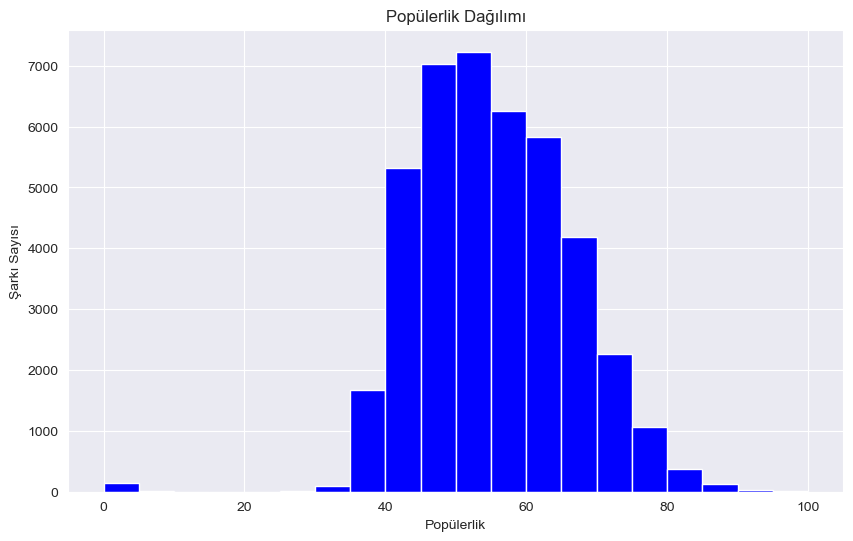

In [9]:
#5 Popülerlik Dağılımı
plt.figure(figsize=(10, 6))
spotify_df['popularity'].hist(bins=20, color='blue')
plt.title('Popülerlik Dağılımı')
plt.xlabel('Popülerlik')
plt.ylabel('Şarkı Sayısı')
plt.show()

In [10]:
#6 Ortalama popülerlik değerinin üzerinde olan en popüler 10 şarkı
avg_popularity = spotify_df['popularity'].mean()
popular_songs = spotify_df[spotify_df['popularity'] > avg_popularity]
popular_songs.nlargest(10, 'popularity')[['name', 'artists', 'popularity']]

name  \
22858                                    Blinding Lights   
22856                       ROCKSTAR (feat. Roddy Ricch)   
22865  death bed (coffee for your head) (feat. beabad...   
22857                                         THE SCOTTS   
22756                                            The Box   
22760                                         Supalonely   
22768               ily (i love you baby) (feat. Emilee)   
22862                                       Toosie Slide   
22774                                       Dance Monkey   
22859                                         Party Girl   

                                          artists  popularity  
22858                              ['The Weeknd']       100.0  
22856                   ['DaBaby', 'Roddy Ricch']        99.0  
22865                    ['Powfu', 'beabadoobee']        97.0  
22857  ['THE SCOTTS', 'Travis Scott', 'Kid Cudi']        96.0  
22756                             ['Roddy Ricch']        95.0  
22760                  ['BENEE', 'Gus Dapperton']        95.0  
22768                     ['Surf Mesa', 'Emilee']        95.0  
22862                                   ['Drake']        95.0  
22774                             ['Tones And I']        94.0  
22859                          ['StaySolidRocky']        94.0

In [11]:
#7 Eminem'in en popüler 5 şarkısını listeleyelim
eminem_songs = spotify_df[spotify_df['artists'] == "['Eminem']"]
eminem_songs.nlargest(5, 'popularity')[['name', 'popularity']]

name  popularity
21057                                Without Me        82.0
20859                       The Real Slim Shady        80.0
21875                                Not Afraid        78.0
21364  Lose Yourself - From "8 Mile" Soundtrack        77.0
22184                                   Rap God        77.0

In [203]:
#8 2015 yılına ait en popüler ilk 5 şarkı
popular_songs_2015 = spotify_df[spotify_df['year'] == 2015].nlargest(5, 'popularity')
popular_songs_2015[['name', 'artists', 'popularity']]

name                          artists  \
22356                           Play Date             ['Melanie Martinez']   
22357          The Less I Know The Better                  ['Tame Impala']   
22358                      Wait a Minute!                       ['WILLOW']   
22367                        Stressed Out            ['Twenty One Pilots']   
22381  See You Again (feat. Charlie Puth)  ['Wiz Khalifa', 'Charlie Puth']   

       popularity  
22356        91.0  
22357        85.0  
22358        83.0  
22367        83.0  
22381        82.0

In [114]:
#9 En fazla şarkının bulunduğu yıl ve o yılki en popüler 5 şarkı
most_common_year = spotify_df['year'].mode()[0]
most_common_year_songs = spotify_df[spotify_df['year'] == most_common_year]
most_common_year_songs.nlargest(5, 'popularity')[['name', 'artists', 'popularity', 'year']]

name             artists  popularity    year
20856              In the End     ['Linkin Park']        83.0  2000.0
20861                  Yellow        ['Coldplay']        81.0  2000.0
20859     The Real Slim Shady          ['Eminem']        80.0  2000.0
20857             Ms. Jackson         ['OutKast']        79.0  2000.0
20865  Oops!...I Did It Again  ['Britney Spears']        78.0  2000.0

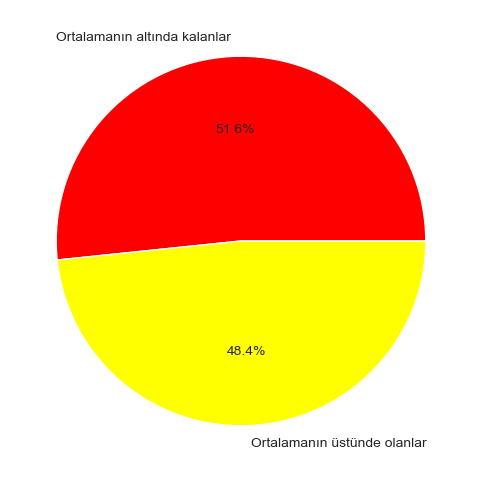

In [115]:
#10 Ortalama popülerlik değerinin altında kalan tüm şarkıların yüzdesi
avg_popularity = spotify_df['popularity'].mean()
below_avg_popularity = spotify_df[spotify_df['popularity'] < avg_popularity]
percentage_below_avg = (len(below_avg_popularity) / len(spotify_df)) * 100
percentage_above_avg = 100 - percentage_below_avg
popularity_data = [percentage_below_avg, percentage_above_avg]
labels = ['Ortalamanın altında kalanlar', 'Ortalamanın üstünde olanlar']
plt.figure(figsize=(6,6))
plt.pie(popularity_data,labels=labels, autopct='%1.1f%%', colors=['red', 'yellow'])
plt.show()

In [116]:
#11 Tempo ve dans edilebilirlik değerleri yüksek (0.7’den fazla) olan şarkıların ilk 5'ini listeleyelim
high_tempo_dance_songs = spotify_df[(spotify_df['tempo'] > 120) & (spotify_df['danceability'] > 0.7)]
high_tempo_dance_songs = high_tempo_dance_songs.sort_values(by='tempo', ascending=False)
high_tempo_dance_songs[['name', 'artists', 'tempo', 'danceability']].head(5)

name                    artists    tempo  \
12900  Brought Up In A Small Neighborhood                ['Lil Rob']  206.782   
14647                               Moana  ['G-Eazy', 'Jack Harlow']  205.990   
22954                               Moana  ['G-Eazy', 'Jack Harlow']  205.895   
18839                     Niggas Die 4 Me         ['Drag-On', 'DMX']  205.807   
23623                           The Beast              ['Tech N9ne']  204.208   

       danceability  
12900         0.728  
14647         0.764  
22954         0.753  
18839         0.709  
23623         0.703

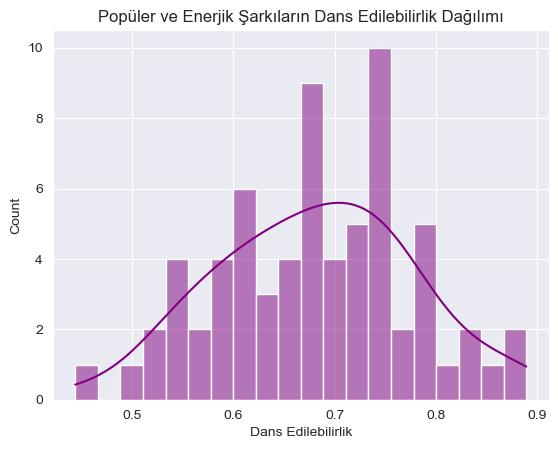

In [117]:
#12 Popüler ve Yüksek Enerjili Şarkılar İçin Dans Edilebilirlik Dağılımı
high_pop_energy = spotify_df[(spotify_df['popularity'] > 80) & (spotify_df['energy'] > 0.8)]
sns.histplot(high_pop_energy['danceability'], bins=20, color='purple', kde=True)
plt.title('Popüler ve Enerjik Şarkıların Dans Edilebilirlik Dağılımı')
plt.xlabel('Dans Edilebilirlik')
plt.show()

In [118]:
#13 Ortalama popülerliği en yüksek olan 5 yıl
top_years_by_popularity = spotify_df.groupby('year')['popularity'].mean().nlargest(5)
top_years_by_popularity

year
2019.0    69.655500
2018.0    67.276000
2017.0    64.861500
2020.0    63.111048
2016.0    61.371254
Name: popularity, dtype: float64

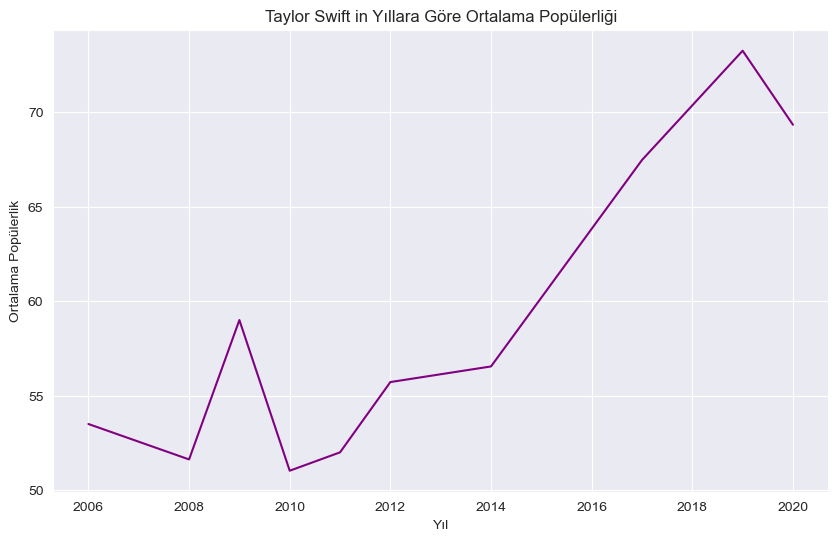

In [119]:
#14 Taylor Swift'in farklı yıllardaki ortalama popülerlik değişiminin çizgi grafikte gösterimi
taylor_swift_popularity = spotify_df[spotify_df['artists'] == "['Taylor Swift']"].groupby('year')['popularity'].mean()
plt.figure(figsize=(10, 6))
taylor_swift_popularity.plot(kind='line', color='purple')
plt.title('Taylor Swift in Yıllara Göre Ortalama Popülerliği')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Popülerlik')
plt.show()

In [120]:
#15 Şarkı Süresilerini Kategorilere Ayırma
#Şarkıları süresine göre üç kategoriye ayıralım: short, medium, long.Her bir kategorinin yüzdesini hesaplayalım
 
conditions = [
    (spotify_df['duration_ms'] < 180000),  # 3 dakikadan kısa
    (spotify_df['duration_ms'] >= 180000) & (spotify_df['duration_ms'] < 300000),  # 3-5 dakika arası
    (spotify_df['duration_ms'] >= 300000)  # 5 dakikadan uzun
]
categories = ['short', 'medium', 'long']
spotify_df['duration_category'] = np.select(conditions, categories)

# Kategorilerin yüzdelerini hesaplama
duration_percentages = spotify_df['duration_category'].value_counts(normalize=True) * 100
duration_percentages

duration_category
medium    72.066449
short     17.510083
long      10.423468
Name: proportion, dtype: float64

In [121]:
#16 En Popüler "Long" Kategorisindeki Şarkılar - İlk 5
long_songs = spotify_df[spotify_df['duration_category'] == 'long']
long_songs.nlargest(5, 'popularity')[['name', 'artists', 'popularity', 'duration_ms']]

name                                            artists  \
22658          SICKO MODE                                   ['Travis Scott']   
29108  La Jeepeta - Remix  ['Nio Garcia', 'Anuel AA', 'Myke Towers', 'Brr...   
26964               China  ['Anuel AA', 'Daddy Yankee', 'KAROL G', 'J Bal...   
22933         After Hours                                     ['The Weeknd']   
21058       The Scientist                                       ['Coldplay']   

       popularity  duration_ms  
22658        92.0     312820.0  
29108        87.0     345241.0  
26964        85.0     301714.0  
22933        84.0     361027.0  
21058        83.0     309600.0

In [122]:
#17 Her Yıl İçin En Popüler "Short" Şarkı
short_songs = spotify_df[spotify_df['duration_category'] == 'short']
most_popular_short_by_year = short_songs.loc[short_songs.groupby('year')['popularity'].idxmax()]
most_popular_short_by_year[['year', 'name', 'artists', 'popularity']]

year                                               name  \
20871  2000.0                                    One Step Closer   
20958  2001.0                                         The Middle   
21065  2002.0                                         The Anthem   
21220  2003.0                                    Pa' Que Retozen   
21259  2004.0                                     American Idiot   
21443  2005.0                                         Lonely Day   
21458  2006.0                                          Teenagers   
21600  2007.0                                      The Way I Are   
21661  2008.0                           You're Gonna Go Far, Kid   
21767  2009.0                                            Monster   
21902  2010.0                    Girl With The Tattoo Enter.lewd   
21964  2011.0                           Barefoot Blue Jean Night   
22056  2012.0                                            Classic   
22232  2013.0           Why'd You Only Call Me When You're High?   
22261  2014.0                                       Stay With Me   
22356  2015.0                                          Play Date   
22486  2016.0                                          One Dance   
22556  2017.0                                     Jocelyn Flores   
22657  2018.0                                            Falling   
22768  2019.0               ily (i love you baby) (feat. Emilee)   
22865  2020.0  death bed (coffee for your head) (feat. beabad...   

                                      artists  popularity  
20871                         ['Linkin Park']        75.0  
20958                     ['Jimmy Eat World']        77.0  
21065                      ['Good Charlotte']        73.0  
21220                       ['Tego Calderon']        71.0  
21259                           ['Green Day']        78.0  
21443                    ['System Of A Down']        71.0  
21458                 ['My Chemical Romance']        77.0  
21600  ['Timbaland', 'Keri Hilson', 'D.O.E.']        73.0  
21661                       ['The Offspring']        77.0  
21767                             ['Skillet']        75.0  
21902                              ['Miguel']        69.0  
21964                           ['Jake Owen']        73.0  
22056                                ['MKTO']        78.0  
22232                      ['Arctic Monkeys']        76.0  
22261                           ['Sam Smith']        82.0  
22356                    ['Melanie Martinez']        91.0  
22486             ['Drake', 'WizKid', 'Kyla']        82.0  
22556                        ['XXXTENTACION']        87.0  
22657                       ['Trevor Daniel']        92.0  
22768                 ['Surf Mesa', 'Emilee']        95.0  
22865                ['Powfu', 'beabadoobee']        97.0

In [123]:
#18 Her Yıl İçin En Popüler "Long" Şarkı
long_songs = spotify_df[spotify_df['duration_category'] == 'long']
most_popular_long_by_year = long_songs.loc[long_songs.groupby('year')['popularity'].idxmax()]
most_popular_long_by_year[['year', 'name', 'artists', 'popularity']]

year                                               name  \
20867  2000.0                         Hey Jude - Remastered 2015   
20988  2001.0                                      One More Time   
21058  2002.0                                      The Scientist   
21177  2003.0                                              Roses   
21325  2004.0                    I'll Be Missing You (feat. 112)   
21364  2005.0           Lose Yourself - From "8 Mile" Soundtrack   
21463  2006.0                                      Snow (Hey Oh)   
21558  2007.0                                           Stronger   
21688  2008.0                     Live Your Life (feat. Rihanna)   
21784  2009.0                                            21 Guns   
21883  2010.0                                            Runaway   
21966  2011.0                                       Marvins Room   
22099  2012.0  Pursuit Of Happiness - Extended Steve Aoki Rem...   
22166  2013.0                                         All I Want   
30620  2014.0                                         Prometiste   
22385  2015.0                            90210 (feat. Kacy Hill)   
22459  2016.0                                            Redbone   
22629  2017.0                                  Sign of the Times   
22658  2018.0                                         SICKO MODE   
26964  2019.0                                              China   
29108  2020.0                                 La Jeepeta - Remix   

                                                 artists  popularity  
20867                                    ['The Beatles']        76.0  
20988                                      ['Daft Punk']        75.0  
21058                                       ['Coldplay']        83.0  
21177                                        ['OutKast']        71.0  
21325                    ['Diddy', 'Faith Evans', '112']        71.0  
21364                                         ['Eminem']        77.0  
21463                          ['Red Hot Chili Peppers']        79.0  
21558                                     ['Kanye West']        80.0  
21688                                ['T.I.', 'Rihanna']        75.0  
21784                                      ['Green Day']        75.0  
21883                          ['Kanye West', 'Pusha T']        72.0  
21966                                          ['Drake']        74.0  
22099      ['Kid Cudi', 'MGMT', 'Ratatat', 'Steve Aoki']        75.0  
22166                                       ['Kodaline']        80.0  
30620  ['Pepe Aguilar', 'Melissa', 'Ángela Aguilar', ...        75.0  
22385                      ['Travis Scott', 'Kacy Hill']        75.0  
22459                               ['Childish Gambino']        82.0  
22629                                   ['Harry Styles']        81.0  
22658                                   ['Travis Scott']        92.0  
26964  ['Anuel AA', 'Daddy Yankee', 'KAROL G', 'J Bal...        85.0  
29108  ['Nio Garcia', 'Anuel AA', 'Myke Towers', 'Brr...        87.0

In [124]:
#19 Her Yılın En Popüler Şarkısı
most_popular_each_year = spotify_df.loc[spotify_df.groupby('year')['popularity'].idxmax()][['year', 'name', 'artists', 'popularity']]
most_popular_each_year

year                                name  \
20856  2000.0                          In the End   
20959  2001.0                         Last Resort   
21056  2002.0                    'Till I Collapse   
21158  2003.0                                Numb   
21257  2004.0    Yeah! (feat. Lil Jon & Ludacris)   
21360  2005.0  Hips Don't Lie (feat. Wyclef Jean)   
21463  2006.0                       Snow (Hey Oh)   
21558  2007.0                            Stronger   
21657  2008.0                           I'm Yours   
21763  2009.0                         Bad Romance   
21856  2010.0                    Hey, Soul Sister   
21957  2011.0                     Pumped Up Kicks   
22057  2012.0                 When I Was Your Man   
22159  2013.0                           All of Me   
22284  2014.0                          Photograph   
22356  2015.0                           Play Date   
22456  2016.0                          goosebumps   
22556  2017.0                      Jocelyn Flores   
22657  2018.0                             Falling   
22756  2019.0                             The Box   
22858  2020.0                     Blinding Lights   

                                artists  popularity  
20856                   ['Linkin Park']        83.0  
20959                    ['Papa Roach']        79.0  
21056           ['Eminem', 'Nate Dogg']        83.0  
21158                   ['Linkin Park']        81.0  
21257  ['Usher', 'Lil Jon', 'Ludacris']        80.0  
21360        ['Shakira', 'Wyclef Jean']        82.0  
21463         ['Red Hot Chili Peppers']        79.0  
21558                    ['Kanye West']        80.0  
21657                    ['Jason Mraz']        82.0  
21763                     ['Lady Gaga']        80.0  
21856                         ['Train']        82.0  
21957             ['Foster The People']        83.0  
22057                    ['Bruno Mars']        82.0  
22159                   ['John Legend']        85.0  
22284                    ['Ed Sheeran']        83.0  
22356              ['Melanie Martinez']        91.0  
22456                  ['Travis Scott']        92.0  
22556                  ['XXXTENTACION']        87.0  
22657                 ['Trevor Daniel']        92.0  
22756                   ['Roddy Ricch']        95.0  
22858                    ['The Weeknd']       100.0

In [125]:
#20 En Popüler Major Mod Şarkılar
# mode değeri 1 olan şarkılar arasından en popüler 5 tanesi
major_mode_songs = spotify_df[spotify_df['mode'] == 1]
major_mode_songs.nlargest(5, 'popularity')[['name', 'artists', 'popularity']]

name                         artists  \
22858                  Blinding Lights                  ['The Weeknd']   
22856     ROCKSTAR (feat. Roddy Ricch)       ['DaBaby', 'Roddy Ricch']   
22760                       Supalonely      ['BENEE', 'Gus Dapperton']   
22867                            GOOBA                     ['6ix9ine']   
22868  Rain On Me (with Ariana Grande)  ['Lady Gaga', 'Ariana Grande']   

       popularity  
22858       100.0  
22856        99.0  
22760        95.0  
22867        94.0  
22868        94.0

In [126]:
#21 En Popüler Dans Edilebilir Şarkılar
popular_dance_songs = spotify_df.nlargest(10, 'danceability')[['name', 'artists', 'danceability', 'popularity']]
popular_dance_songs

name  \
15390                                          Go Girl   
32516                                          Go Girl   
16915                                    Stay Don't Go   
20471                 UP LIKE AN INSOMNIAC - Freestyle   
21727                                     Ice Ice Baby   
25552  Cha Cha Slide - Original Live Platinum Band Mix   
33173                                              Uno   
5988                                            Menace   
7882       For Everybody (feat. Wiz Khalifa & R. City)   
14636                              Fox 5 (feat. Gunna)   

                                                 artists  danceability  \
15390                 ['Young Boss', 'Trina', 'Pitbull']         0.986   
32516                   ['Pitbull', 'Trina', 'Young Bo']         0.986   
16915                                          ['Spoon']         0.985   
20471                                   ['XXXTENTACION']         0.979   
21727                                    ['Vanilla Ice']         0.979   
25552                                      ['DJ Casper']         0.978   
33173                                        ['Ambjaay']         0.978   
5988   ['Quality Control', 'Lil Yachty', 'Quavo', 'Of...         0.977   
7882               ['Juicy J', 'Wiz Khalifa', 'R. City']         0.977   
14636                              ['Lil Keed', 'Gunna']         0.975   

       popularity  
15390        44.0  
32516        55.0  
16915        37.0  
20471        57.0  
21727        70.0  
25552        55.0  
33173        70.0  
5988         58.0  
7882         53.0  
14636        59.0

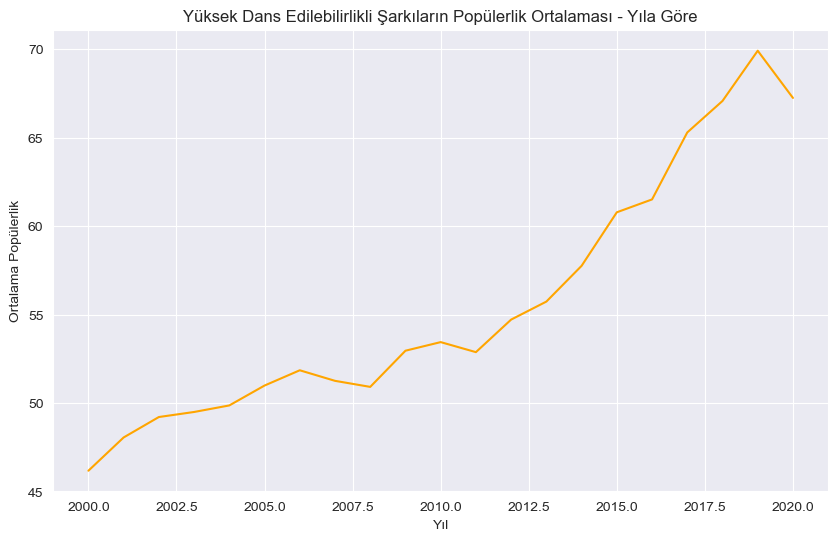

In [127]:
#22 Dans Edilebilirliği Yüksek Şarkıların Popülerlik Ortalaması - Yıla Göre
high_dance_popularity = spotify_df[spotify_df['danceability'] > 0.8].groupby('year')['popularity'].mean()
high_dance_popularity.plot(kind='line', color='orange', figsize=(10, 6))
plt.title('Yüksek Dans Edilebilirlikli Şarkıların Popülerlik Ortalaması - Yıla Göre')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Popülerlik')
plt.show()

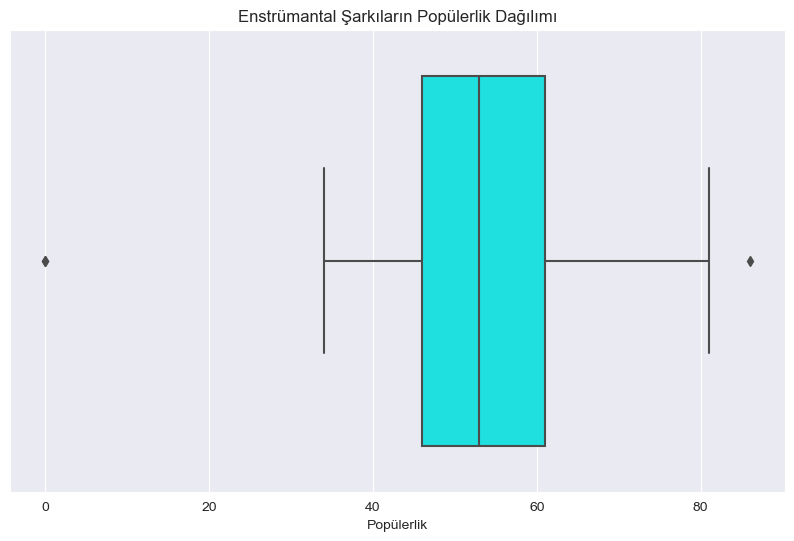

In [128]:
#23 Enstrümantal (Instrumentalness) Değerlerine Göre Popülerlik Dağılımı
instrumental_songs = spotify_df[spotify_df['instrumentalness'] > 0.8]
plt.figure(figsize=(10, 6))
sns.boxplot(x=instrumental_songs['popularity'], color='cyan')
plt.title('Enstrümantal Şarkıların Popülerlik Dağılımı')
plt.xlabel('Popülerlik')
plt.show()

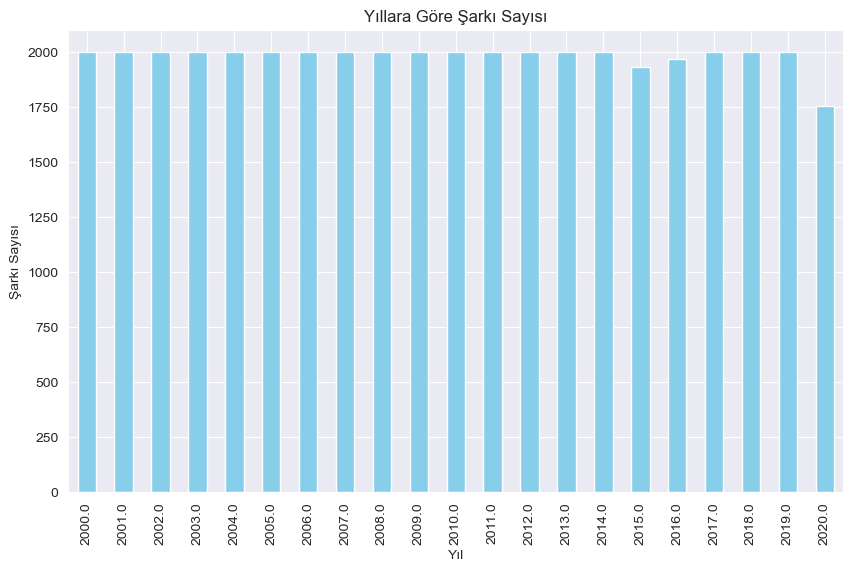

In [129]:
#24 Her yıl için toplam şarkı sayısı ve yıllara göre bir çubuk grafiği
yearly_counts = spotify_df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Yıllara Göre Şarkı Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Şarkı Sayısı')
plt.show()

In [130]:
#25 Şarkıların ortalama popülerlikleri
spotify_df['popularity'].mean()

54.837142308430955

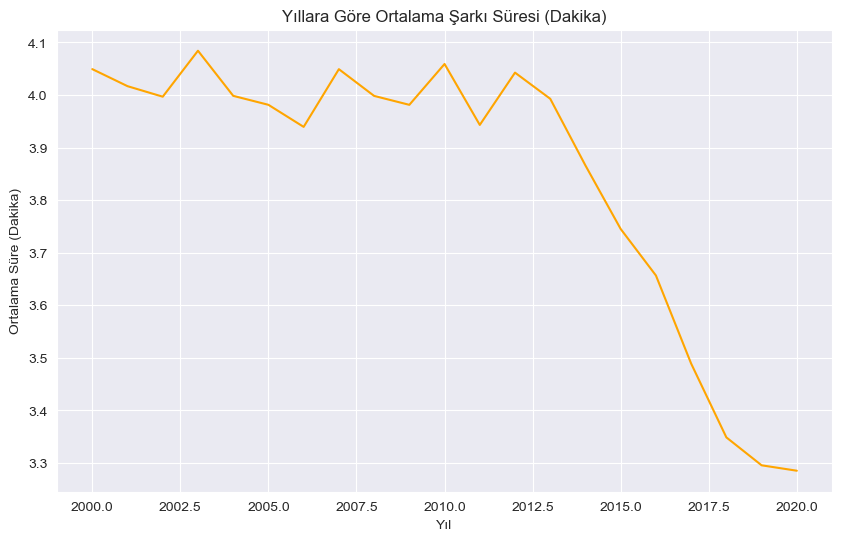

In [131]:
#26 Yıllık Ortalama Şarkı Süreleri
avg_duration_by_year = spotify_df.groupby('year')['duration_ms'].mean() / 60000
plt.figure(figsize=(10, 6))
avg_duration_by_year.plot(kind='line', color='orange')
plt.title('Yıllara Göre Ortalama Şarkı Süresi (Dakika)')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Süre (Dakika)')
plt.show()

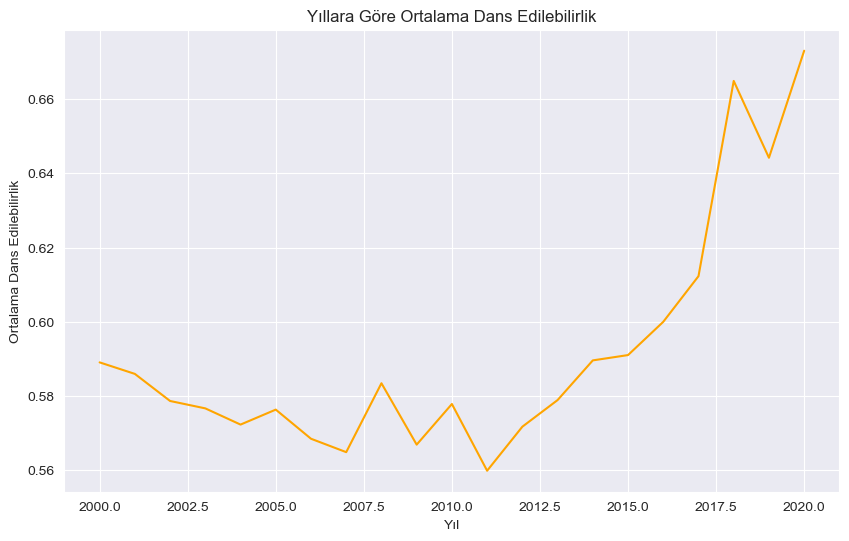

In [132]:
#27 Yıllara göre dans edilebilirlik ortalamasını çizgi grafikte gösterelim
avg_danceability_by_year = spotify_df.groupby('year')['danceability'].mean()
plt.figure(figsize=(10, 6))
avg_danceability_by_year.plot(kind='line', color='orange')
plt.title('Yıllara Göre Ortalama Dans Edilebilirlik')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Dans Edilebilirlik')
plt.show()

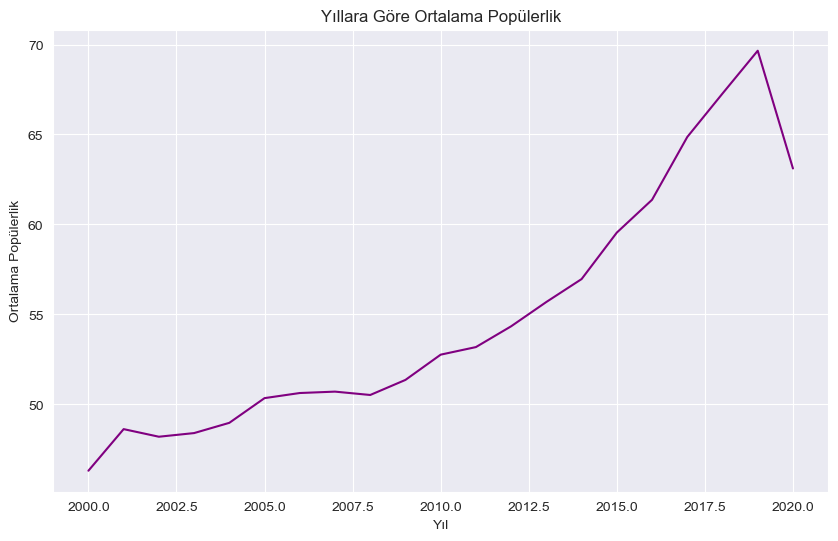

In [133]:
#28 Yıllara Göre Ortalama Popülerlik Değeri
avg_valence_by_year = spotify_df.groupby('year')['popularity'].mean()
avg_valence_by_year.plot(kind='line', color='purple', figsize=(10, 6))
plt.title('Yıllara Göre Ortalama Popülerlik')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Popülerlik')
plt.show()

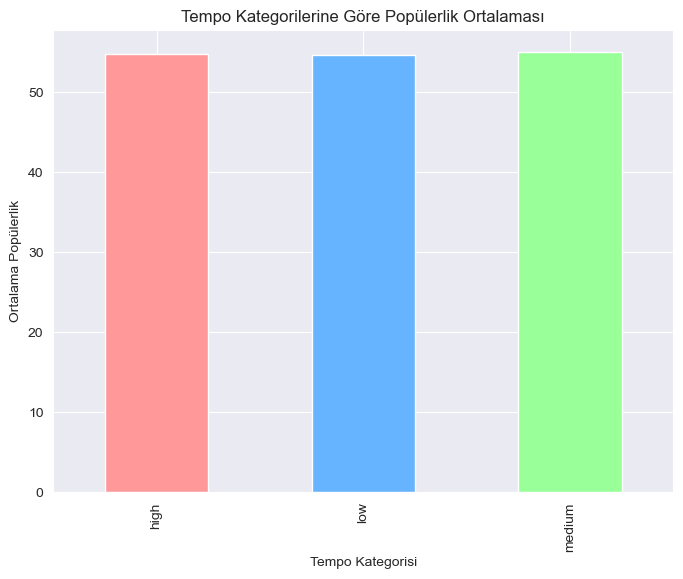

In [134]:
#29 Tempo Kategorilerine Göre Popülerlik Karşılaştırması
tempo_conditions = [
    (spotify_df['tempo'] < 90),  # Düşük tempo
    (spotify_df['tempo'] >= 90) & (spotify_df['tempo'] < 130),  # Orta tempo
    (spotify_df['tempo'] >= 130)  # Yüksek tempo
]
tempo_labels = ['low', 'medium', 'high']
spotify_df['tempo_category'] = np.select(tempo_conditions, tempo_labels)

popularity_by_tempo = spotify_df.groupby('tempo_category')['popularity'].mean()
popularity_by_tempo.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'], figsize=(8, 6))
plt.title('Tempo Kategorilerine Göre Popülerlik Ortalaması')
plt.xlabel('Tempo Kategorisi')
plt.ylabel('Ortalama Popülerlik')
plt.show()

In [135]:
#30 Her Süre Kategorisi İçin Tempo Ortalaması
tempo_by_duration = spotify_df.groupby('duration_category')['tempo'].mean()
tempo_by_duration

duration_category
long      118.603325
medium    121.801524
short     119.584639
Name: tempo, dtype: float64

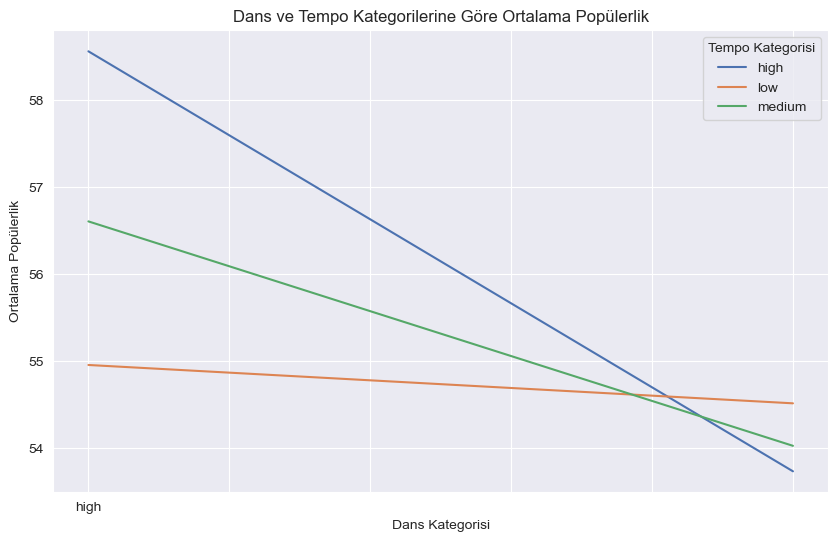

In [136]:
#31 Dans Edilebilirlik ve Tempo Kategorilerine Göre Ortalama Popülerlik - Çizgi Grafikte
spotify_df['dance_category'] = np.where(spotify_df['danceability'] > 0.7, 'high', 'low')
popularity_by_dance_tempo = spotify_df.groupby(['dance_category', 'tempo_category'])['popularity'].mean().unstack()
popularity_by_dance_tempo.plot(kind='line', figsize=(10, 6))
plt.title('Dans ve Tempo Kategorilerine Göre Ortalama Popülerlik')
plt.xlabel('Dans Kategorisi')
plt.ylabel('Ortalama Popülerlik')
plt.legend(title='Tempo Kategorisi')
plt.show()

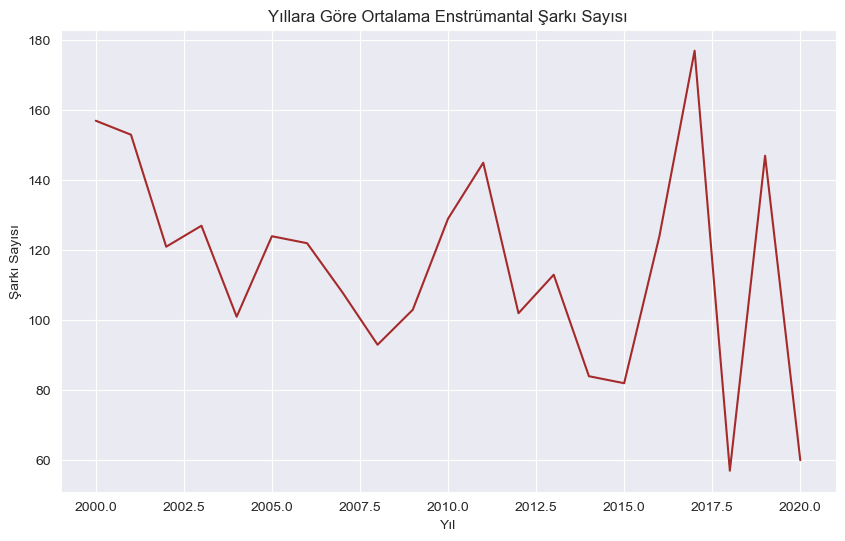

In [137]:
#32 Yıllara Göre Ortalama Enstrümantal Şarkı Sayısı
yearly_instrumental_avg = spotify_df[spotify_df['instrumentalness'] > 0.7].groupby('year').size()
yearly_instrumental_avg.plot(kind='line', color='brown', figsize=(10, 6))
plt.title('Yıllara Göre Ortalama Enstrümantal Şarkı Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Şarkı Sayısı')
plt.show()

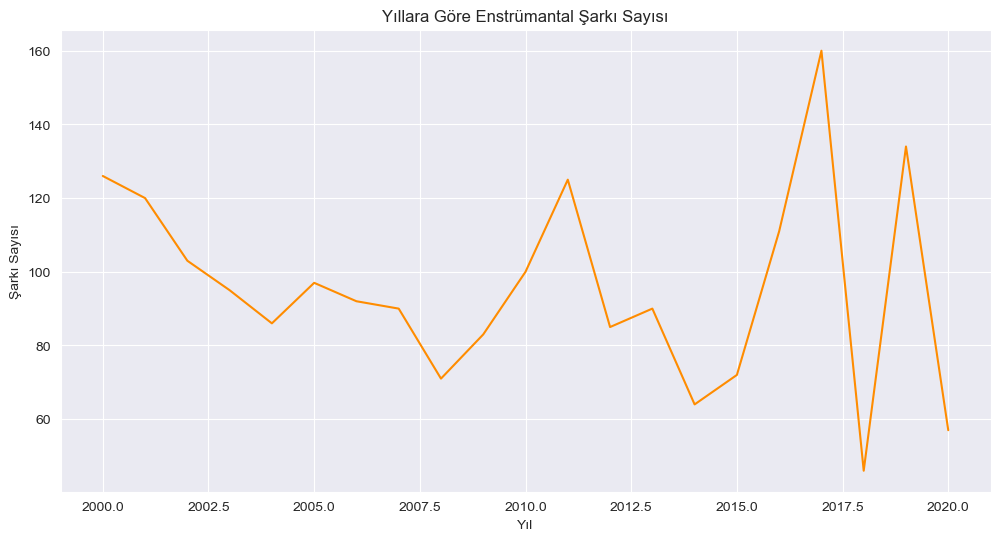

In [138]:
#33 Yıllara Göre Enstrümantal Şarkı Sayısının Dağılımı
instrumental_songs_by_year = spotify_df[spotify_df['instrumentalness'] > 0.8]['year'].value_counts().sort_index()
instrumental_songs_by_year.plot(kind='line', color='darkorange', figsize=(12, 6))
plt.title('Yıllara Göre Enstrümantal Şarkı Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Şarkı Sayısı')
plt.show()

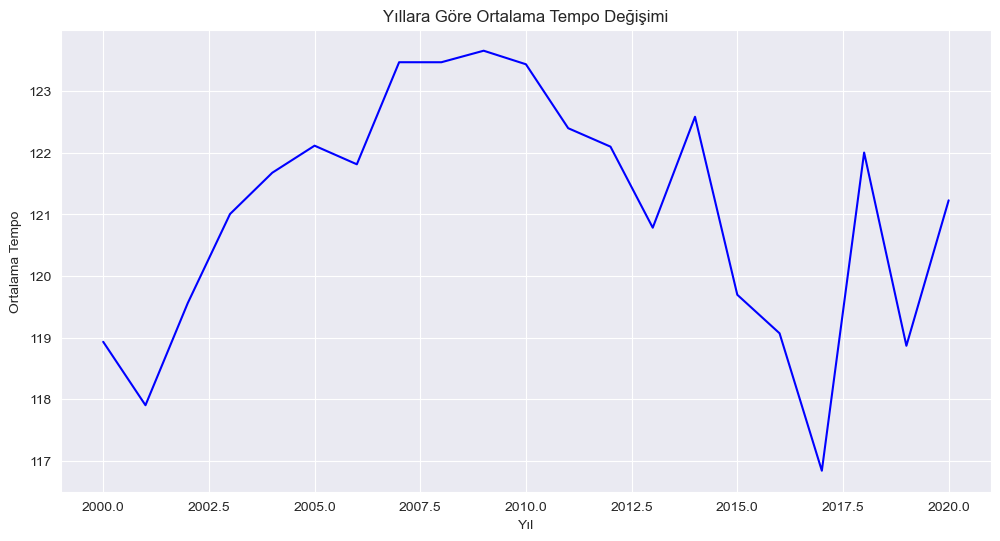

In [139]:
#34 Yıllara Göre Ortalama Tempo Değişimi
yearly_tempo = spotify_df.groupby('year')['tempo'].mean()
yearly_tempo.plot(kind='line', color='blue', figsize=(12, 6))
plt.title('Yıllara Göre Ortalama Tempo Değişimi')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Tempo')
plt.show()

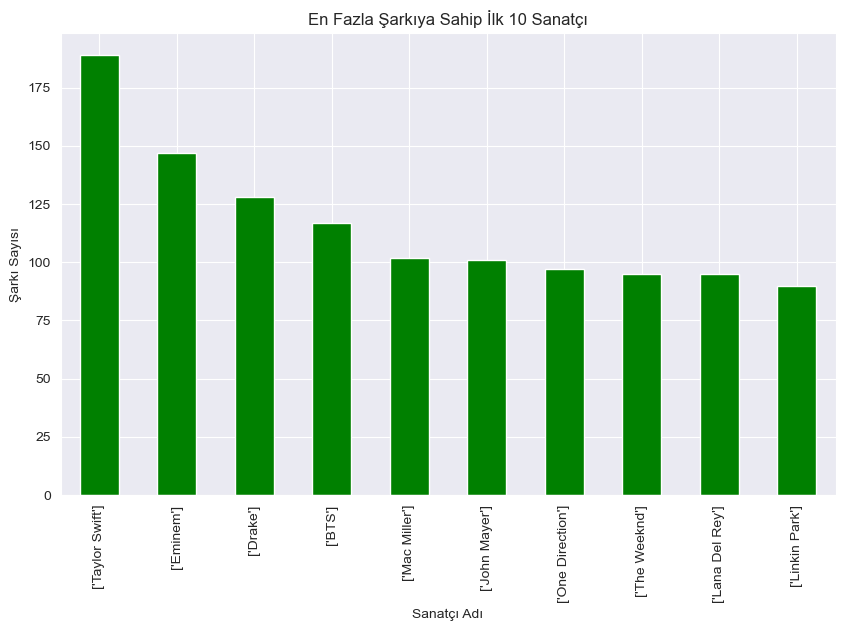

In [140]:
#35 En fazla şarkıya sahip ilk 10 sanatçı
top_artists = spotify_df['artists'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='green')
plt.title('En Fazla Şarkıya Sahip İlk 10 Sanatçı')
plt.xlabel('Sanatçı Adı')
plt.ylabel('Şarkı Sayısı')
plt.show()

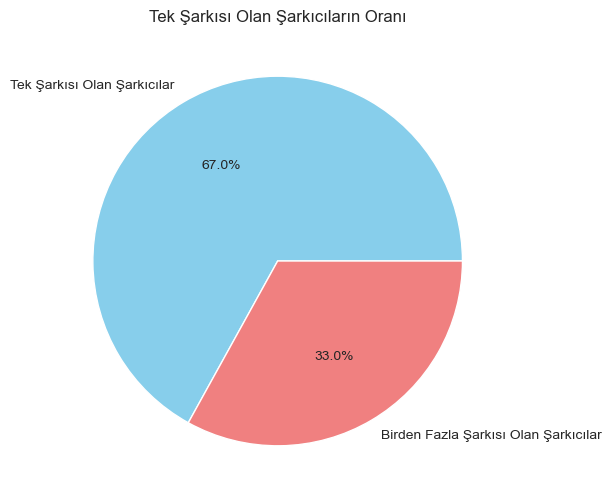

In [141]:
#36 Sadece tek bir şarkısı olan şarkıcıların oranını pasta grafik ile gösterme
# Her şarkıcının şarkı sayısını hesapla
song_counts = spotify_df['artists'].value_counts()
#toplam sanatçı = 14818
# Sadece bir şarkısı olan şarkıcıların sayısını ve toplam şarkıcı sayısını bul
single_song_artists = (song_counts == 1).sum()
total_artists = len(song_counts)
#tek şarkısı olan sanatçılar = 9923
# Tek şarkısı olan şarkıcıların oranını hesapla
percentage_single_song = (single_song_artists / total_artists) * 100
percentage_multiple_songs = 100 - percentage_single_song  # Diğerlerinin oranı

# Veri yapısını pasta grafikte göstermek için hazırla
data = [percentage_single_song, percentage_multiple_songs]
labels = ['Tek Şarkısı Olan Şarkıcılar', 'Birden Fazla Şarkısı Olan Şarkıcılar']

# Pasta grafiği çiz
plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Tek Şarkısı Olan Şarkıcıların Oranı")
plt.show()

In [142]:
#37 En uzun ve en kısa şarkı
longest_duration = spotify_df['duration_ms'].max()
longest_songs = spotify_df[spotify_df['duration_ms'] == longest_duration][['name', 'artists', 'duration_ms']]

shortest_duration = spotify_df['duration_ms'].min()
shortest_songs = spotify_df[spotify_df['duration_ms'] == shortest_duration][['name', 'artists', 'duration_ms']]

print("En uzun şarkı:")
print(longest_songs)

print("\nEn kısa şarkı:")
print(shortest_songs)

En uzun şarkı:
                          name            artists  duration_ms
1357  Brown Noise - 90 Minutes  ['Sound Dreamer']    5403500.0

En kısa şarkı:
        name                artists  duration_ms
36797  Juice  ['Chance the Rapper']      30301.0


In [143]:
#38 2000’li Yıllarda Çıkmış Akustik Şarkılar
acoustic_2000s = spotify_df[(spotify_df['year'] >= 2000) & (spotify_df['year'] < 2010) & (spotify_df['acousticness'] > 0.7)]
acoustic_2000s[['name', 'artists', 'year', 'acousticness']].head(10)

name  \
0                                   Shout to the Lord   
9                                               Earth   
12  Ave Maria, Op. 52 No. 6, D. 839 (Arr. for Sopr...   
35                                     I Will Be Here   
42  Symphony No. 9 in E Minor, Op. 95 "From the Ne...   
46                                   Indian War Whoop   
49                                   Imagíname Sin Ti   
51                                             Daniel   
52                            Chicka Chicka Boom Boom   
58                                       Gortoz A Ran   

                                              artists    year  acousticness  
0                                     ['David Bauer']  2000.0         0.972  
9   ['Hans Zimmer', 'Gavin Greenaway', 'The Lyndhu...  2000.0         0.759  
12  ['The Cathedral Singers', 'Lorelei McDermott',...  2000.0         0.988  
35                                ['Gary Valenciano']  2000.0         0.793  
42  ['Antonín Dvořák', 'London Symphony Orchestra'...  2000.0         0.890  
46                                  ['John Hartford']  2000.0         0.886  
49                                     ['Luis Fonsi']  2000.0         0.775  
51                                           ['Fuel']  2000.0         0.805  
52             ['John Archambault and David Plummer']  2000.0         0.819  
58                  ['Denez Prigent', 'Lisa Gerrard']  2000.0         0.931

In [144]:
#39 Ortalama şarkı süresi ve varyansı (ms cinsinden)
spotify_df['duration_ms'].mean(), spotify_df['duration_ms'].var()

(231129.1148454004, 8156267690.819012)

In [145]:
#40 Ortalama şarkı süresi ve varyansı (dakika cinsinden)
average_duration_min = spotify_df['duration_ms'].mean() / 60000
variance_duration_min = spotify_df['duration_ms'].var() / (60000 ** 2)

average_duration_min, variance_duration_min

(3.852151914090007, 2.265629914116392)

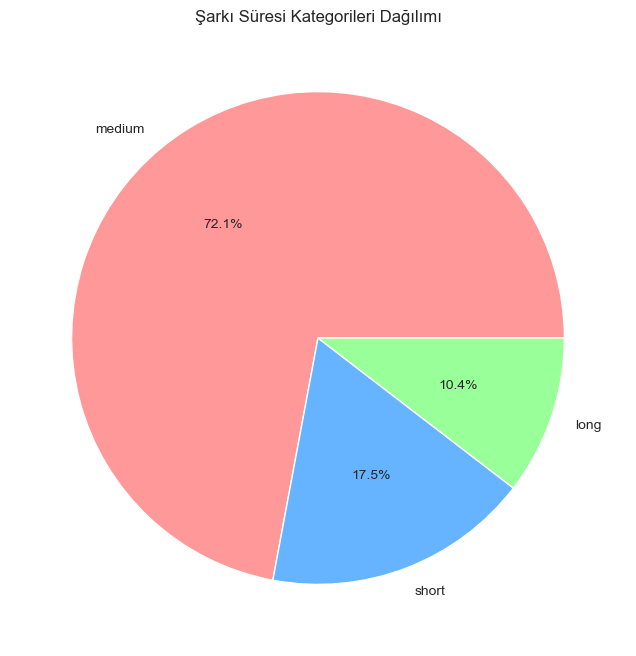

In [146]:
#41 Kısa, orta ve uzun şarkıların yüzdelik dağılımının pasta grafikte gösterimi
plt.figure(figsize=(8, 8))
duration_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Şarkı Süresi Kategorileri Dağılımı')
plt.ylabel('')  # Y eksenini gizler
plt.show()

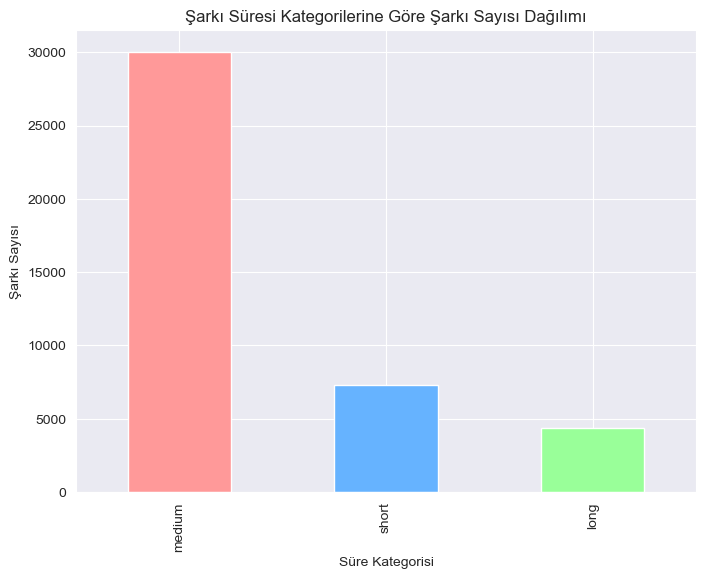

In [147]:
#42 Süre Kategorisine Göre Şarkı Sayısı Dağılımını Çubuk Grafikte Gösterme
duration_counts = spotify_df['duration_category'].value_counts()
duration_counts.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'], figsize=(8, 6))
plt.title('Şarkı Süresi Kategorilerine Göre Şarkı Sayısı Dağılımı')
plt.xlabel('Süre Kategorisi')
plt.ylabel('Şarkı Sayısı')
plt.show()

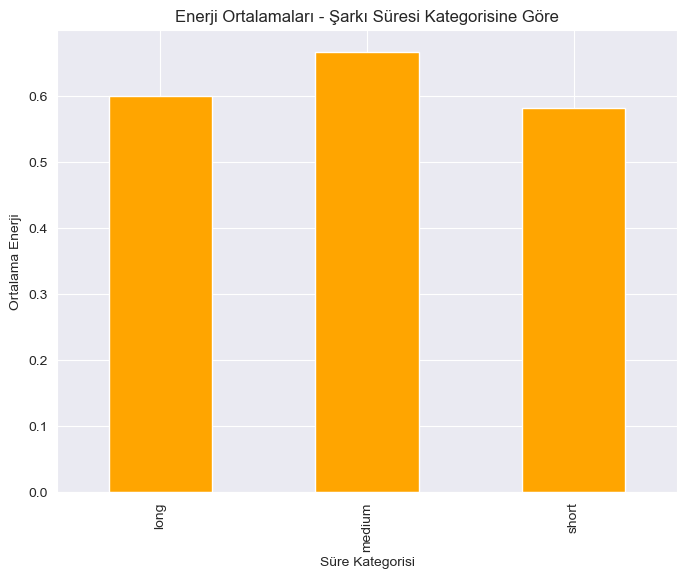

In [148]:
#43 Enerji ve Şarkı Süresi Kategorisi Karşılaştırması
energy_by_duration = spotify_df.groupby('duration_category')['energy'].mean()
energy_by_duration.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Enerji Ortalamaları - Şarkı Süresi Kategorisine Göre')
plt.xlabel('Süre Kategorisi')
plt.ylabel('Ortalama Enerji')
plt.show()

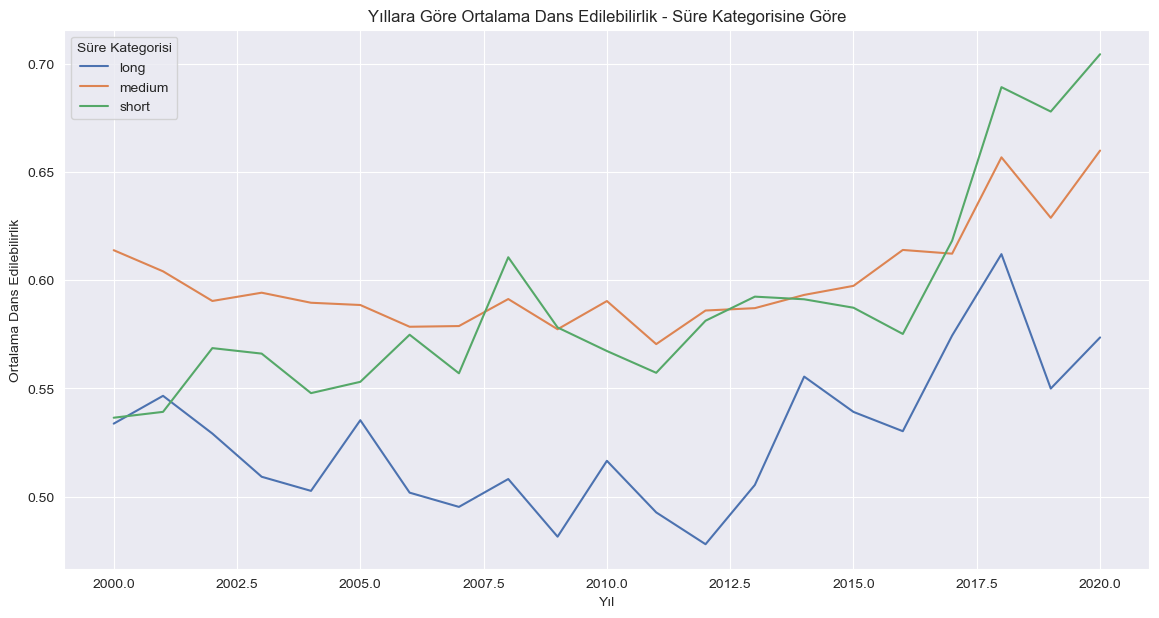

In [149]:
#44 Her Yıl İçin Ortalama Dans Edilebilirlik (Danceability) - Süre Kategorisine Göre
danceability_by_year_duration = spotify_df.groupby(['year', 'duration_category'])['danceability'].mean().unstack()
danceability_by_year_duration.plot(kind='line', figsize=(14, 7))
plt.title('Yıllara Göre Ortalama Dans Edilebilirlik - Süre Kategorisine Göre')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Dans Edilebilirlik')
plt.legend(title='Süre Kategorisi')
plt.show()

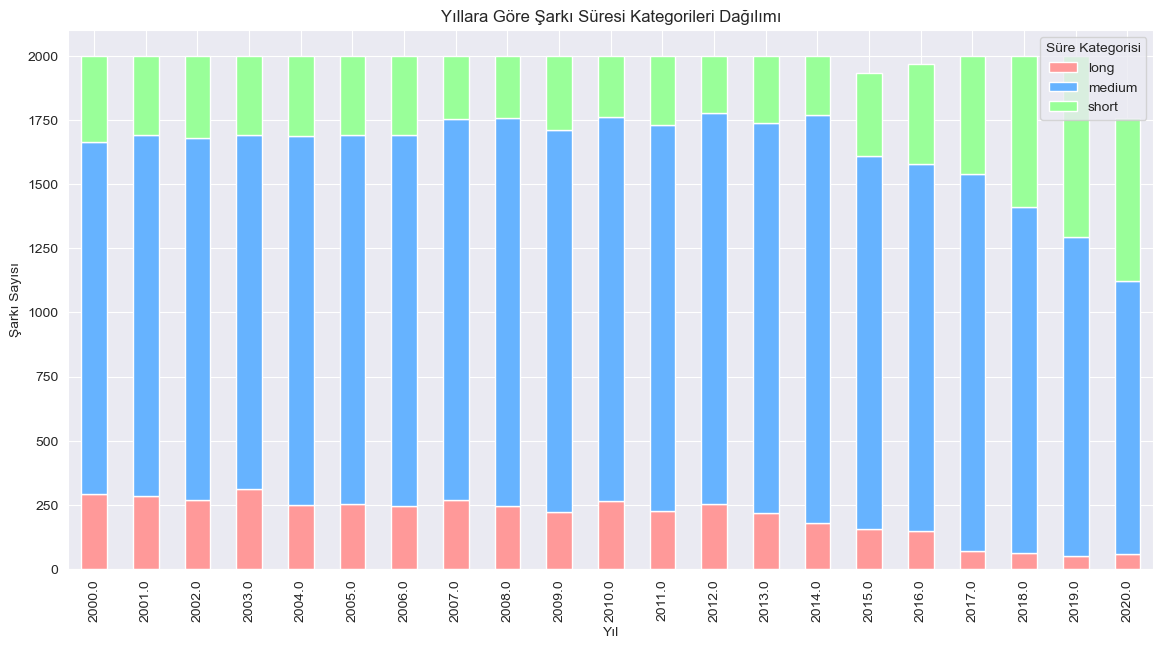

In [150]:
#45 Her yıl için kısa, orta ve uzun şarkıların sayısının çubuk grafikte gösterimi
duration_by_year = spotify_df.groupby(['year', 'duration_category']).size().unstack()
duration_by_year.plot(kind='bar', stacked=True, figsize=(14, 7), color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Yıllara Göre Şarkı Süresi Kategorileri Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Şarkı Sayısı')
plt.legend(title='Süre Kategorisi')
plt.show()

In [151]:
#46 Dans Edilebilir Şarkılar
high_danceability_songs = spotify_df[spotify_df['danceability'] > 0.8]
high_danceability_songs[['name', 'artists', 'danceability']].head(5)

name             artists  danceability
1                          Miss You      ['Etta James']         0.821
5   Self Conscience - Dirty Version  ['Prodigy', 'Nas']         0.829
7                 Barney Theme Song          ['Barney']         0.974
10             Nothing From Nothing   ['Billy Preston']         0.809
14                         Olvidala  ['Junior & Jorge']         0.953

In [152]:
#47 Hem enerji hem de dans edilebilirlik değeri 0.8’den fazla olan şarkılar
high_energy_dance_songs = spotify_df[(spotify_df['energy'] > 0.8) & (spotify_df['danceability'] > 0.8)]
high_energy_dance_songs[['name', 'artists', 'energy', 'danceability']].head(5)

name                         artists  energy  \
76   Ven Conmigo (Solamente Tú)          ['Christina Aguilera']   0.882   
85        Como Te Llamas Paloma        ['Jaime Y Los Chamacos']   0.819   
200        La Muerte Del Grande  ['Los Originales De San Juan']   0.827   
312           Me Voy Pa'l Party                   ['Nicky Jam']   0.936   
327               U Not Like Me                     ['50 Cent']   0.847   

     danceability  
76          0.905  
85          0.841  
200         0.803  
312         0.825  
327         0.806

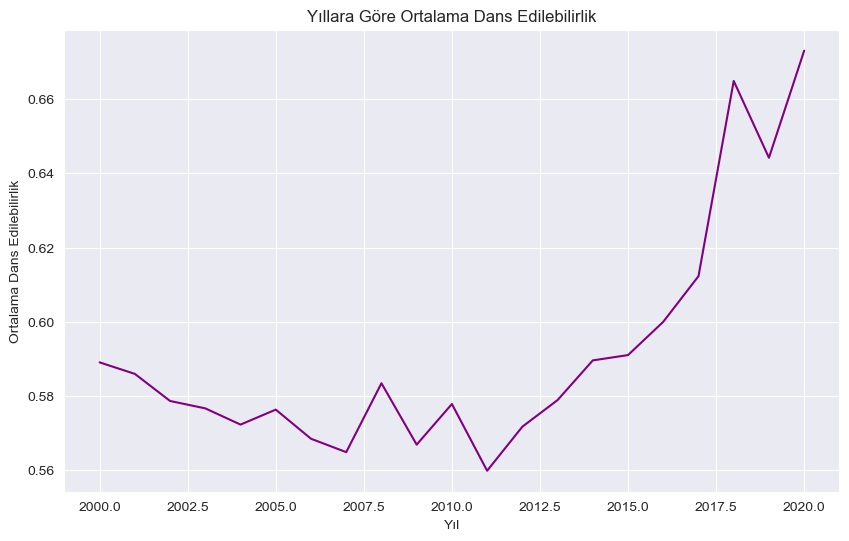

In [153]:
#48 Şarkıların yıllara göre dans edilebilirliği
danceability_by_year = spotify_df.groupby('year')['danceability'].mean()
plt.figure(figsize=(10, 6))
danceability_by_year.plot(kind='line', color='purple')
plt.title('Yıllara Göre Ortalama Dans Edilebilirlik')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Dans Edilebilirlik')
plt.show()

In [154]:
#49 Dans Edilebilirliği Yüksek, Temposu Düşük Şarkılar
low_tempo_dance_songs = spotify_df[(spotify_df['danceability'] > 0.8) & (spotify_df['tempo'] < 100)]
low_tempo_dance_songs[['name', 'artists', 'danceability', 'tempo']].head(5)

name                          artists  \
5   Self Conscience - Dirty Version               ['Prodigy', 'Nas']   
22           Coming of age ceremony                 ['Park Ji Yoon']   
54           Careful (Click, Click)                 ['Wu-Tang Clan']   
62                  Mi Linda Esposa  ['Los Invasores De Nuevo León']   
85            Como Te Llamas Paloma         ['Jaime Y Los Chamacos']   

    danceability   tempo  
5          0.829  90.924  
22         0.884  99.067  
54         0.831  90.367  
62         0.846  99.994  
85         0.841  98.831

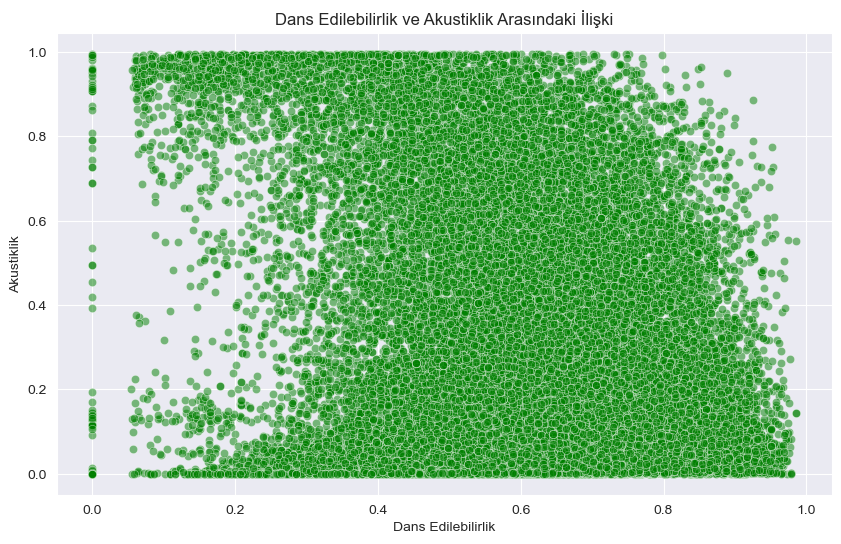

In [155]:
#50 Dans Edilebilirlik ve Akustiklik Arasındaki İlişki - Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_df, x='danceability', y='acousticness', alpha=0.5, color='green')
plt.title('Dans Edilebilirlik ve Akustiklik Arasındaki İlişki')
plt.xlabel('Dans Edilebilirlik')
plt.ylabel('Akustiklik')
plt.show()

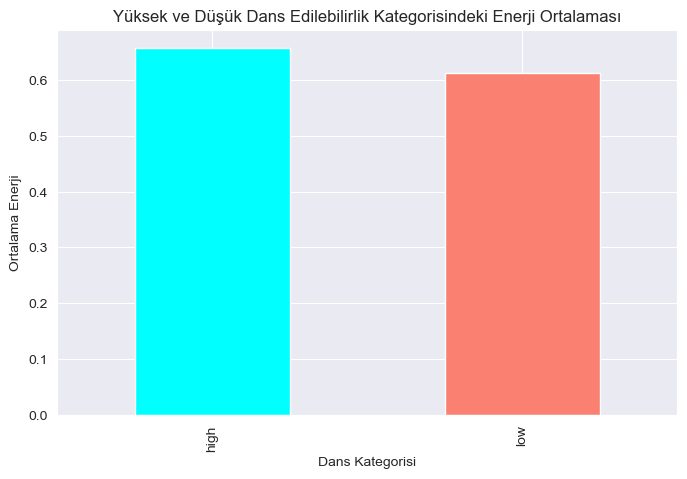

In [156]:
#51 Yüksek ve Düşük Dans Edilebilirlik Kategorisindeki Şarkıların Enerji Ortalaması
spotify_df['dance_category'] = np.where(spotify_df['danceability'] > 0.5, 'high', 'low')
dance_energy_avg = spotify_df.groupby('dance_category')['energy'].mean()
dance_energy_avg.plot(kind='bar', color=['cyan', 'salmon'], figsize=(8, 5))
plt.title('Yüksek ve Düşük Dans Edilebilirlik Kategorisindeki Enerji Ortalaması')
plt.xlabel('Dans Kategorisi')
plt.ylabel('Ortalama Enerji')
plt.show()

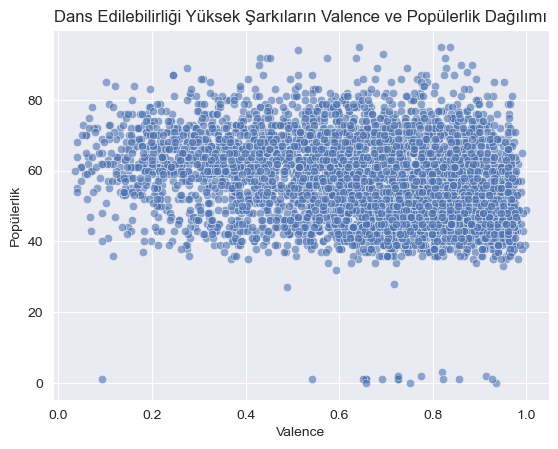

In [157]:
#52 Dans Edilebilirlik Yüksekliği ve Valence Dağılımı İlişkisi
high_dance_valence = spotify_df[spotify_df['danceability'] > 0.8]
sns.scatterplot(data=high_dance_valence, x='valence', y='popularity', alpha=0.6)
plt.title('Dans Edilebilirliği Yüksek Şarkıların Valence ve Popülerlik Dağılımı')
plt.xlabel('Valence')
plt.ylabel('Popülerlik')
plt.show()

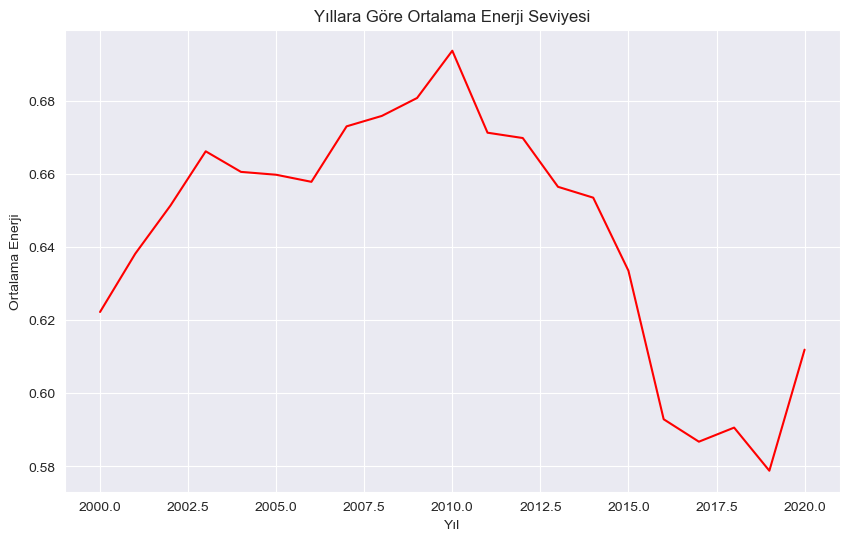

In [158]:
#53 Yıllara Göre Enerji Seviyeleri
avg_energy_by_year = spotify_df.groupby('year')['energy'].mean()
plt.figure(figsize=(10, 6))
avg_energy_by_year.plot(kind='line', color='red')
plt.title('Yıllara Göre Ortalama Enerji Seviyesi')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Enerji')
plt.show()

In [159]:
#54 Yüksek Enerjili ve Yüksek Tempolu Şarkılar
high_energy_tempo_songs = spotify_df[(spotify_df['energy'] > 0.8) & (spotify_df['tempo'] > 130)]
high_energy_tempo_songs[['name', 'artists', 'energy', 'tempo']].head(10)

name  \
3                              Penguins & Polarbears   
28                                     Drag You Down   
36                                 Black Friday Rule   
53                                   You're An Ocean   
55                                        Press Gang   
57                                     1-900-Hustler   
84                                     So I Need You   
86                          Tornasol (Vuelves a Ser)   
92                                          Golden I   
94  Snappin' & Trappin' (with Killer Mike & J-Sweet)   

                                              artists  energy    tempo  
3                                     ['Millencolin']   0.977  165.889  
28                                  ['Finger Eleven']   0.872  200.243  
36                                 ['Flogging Molly']   0.950  142.454  
53                                       ['Fastball']   0.958  134.087  
55                         ['The Murder City Devils']   0.931  167.516  
57  ['JAY-Z', 'Beanie Sigel', 'Memphis Bleek', 'Fr...   0.911  179.979  
84                                   ['3 Doors Down']   0.910  144.906  
86                                ['La Gusana Ciega']   0.926  154.349  
92                       ['Mindless Self Indulgence']   0.844  167.865  
94              ['OutKast', 'Killer Mike', 'J-Sweet']   0.922  193.910

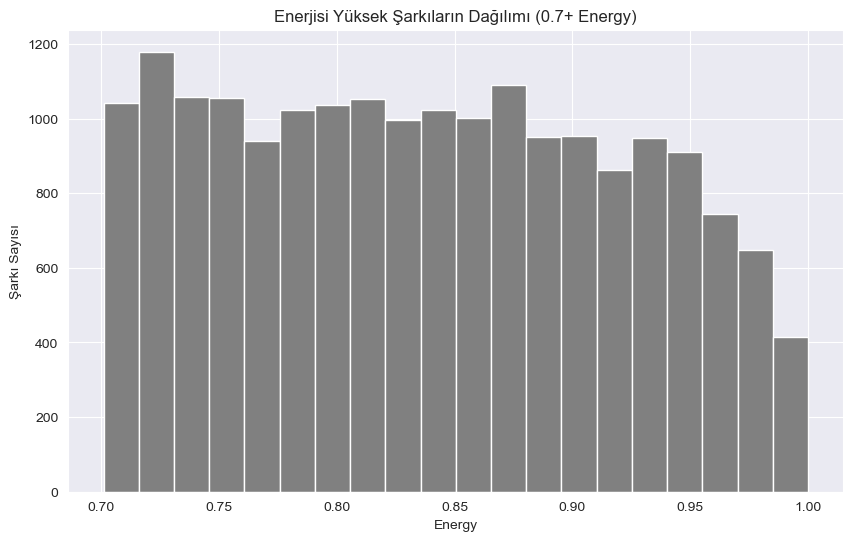

In [160]:
#55 Enerjisi Yüksek Şarkılar Histogramı
plt.figure(figsize=(10, 6))
spotify_df[spotify_df['energy'] > 0.7]['energy'].hist(bins=20, color='gray')
plt.title('Enerjisi Yüksek Şarkıların Dağılımı (0.7+ Energy)')
plt.xlabel('Energy')
plt.ylabel('Şarkı Sayısı')
plt.show()

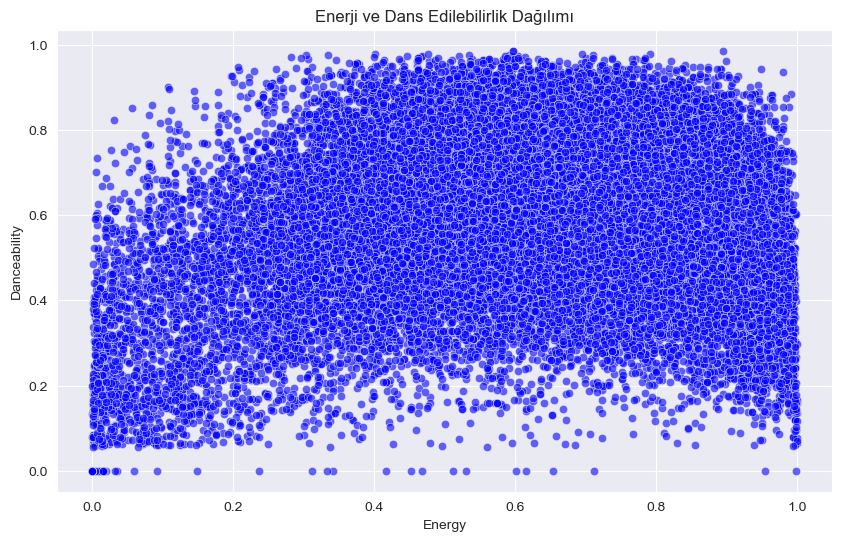

In [161]:
#56 Şarkıların Enerji ve Dans Edilebilirlik Değerlerinin Dağılımı
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_df, x='energy', y='danceability', alpha=0.6, color='blue')
plt.title('Enerji ve Dans Edilebilirlik Dağılımı')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

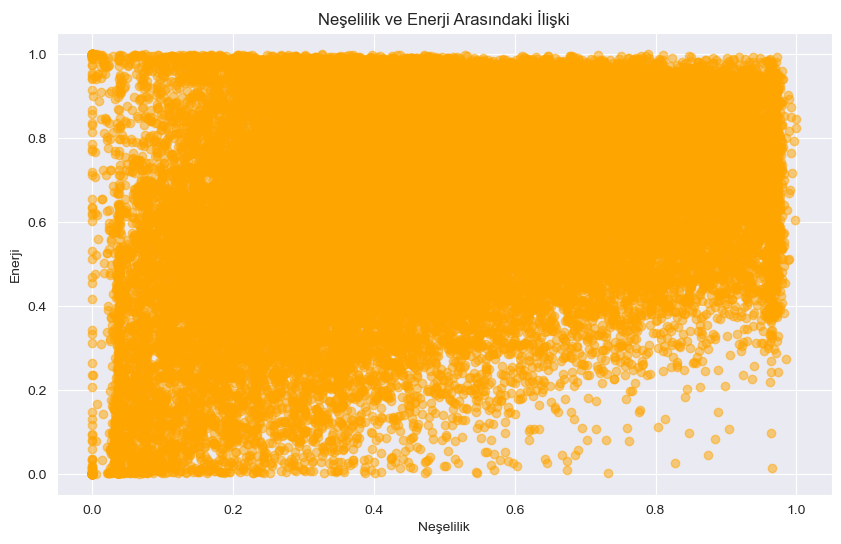

In [162]:
#57 Neşelilik ve Enerji arasındaki ilişkiyi gösteren dağılım grafiği
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['valence'], spotify_df['energy'], alpha=0.5, color='orange')
plt.title('Neşelilik ve Enerji Arasındaki İlişki')
plt.xlabel('Neşelilik')
plt.ylabel('Enerji')
plt.show()

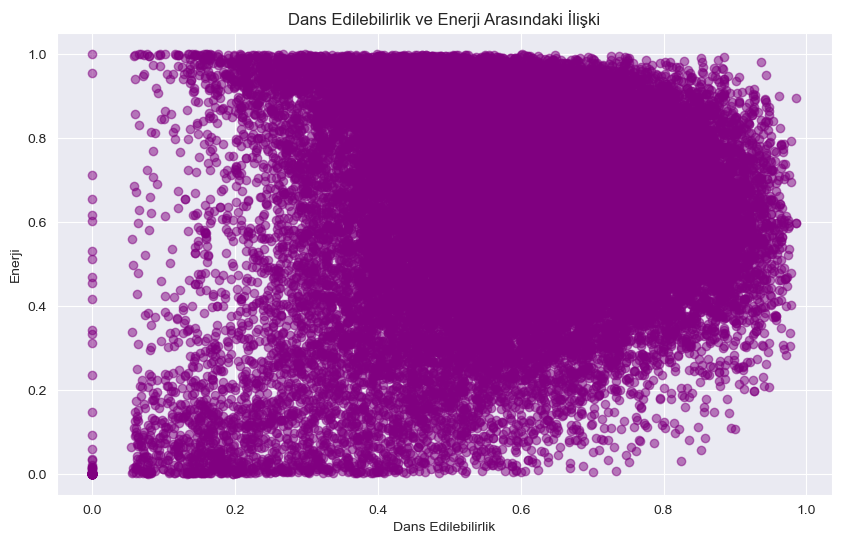

In [163]:
#58 Dans edilebilirlik ve enerji arasındaki ilişkiyi incelemek için bir dağılım grafiği 
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['danceability'], spotify_df['energy'], alpha=0.5, color='purple')
plt.title('Dans Edilebilirlik ve Enerji Arasındaki İlişki')
plt.xlabel('Dans Edilebilirlik')
plt.ylabel('Enerji')
plt.show()

In [164]:
#59 Her Yılın En Yüksek Enerjiye Sahip Şarkısı
most_energetic_each_year = spotify_df.loc[spotify_df.groupby('year')['energy'].idxmax()][['year', 'name', 'artists', 'energy']]
most_energetic_each_year

year                                               name  \
29186  2000.0                                Street Fighting Man   
6493   2001.0                                            Payback   
248    2002.0                                       Battle Ready   
2428   2003.0                                           94 Hours   
12966  2004.0                      List Of Demands (Reparations)   
2633   2005.0                                          Dirthouse   
11103  2006.0                                             Drones   
19553  2007.0                                The Art of Partying   
23852  2008.0                                     Caramelldansen   
19729  2009.0                                         Contractor   
13645  2010.0                                 Ocean Waves Sounds   
1188   2011.0               Rain Forest and Tropical Beach Sound   
22129  2012.0  Relaxing Constant Rain Storm with Distant Thun...   
32592  2013.0                                            Burn MF   
28473  2014.0                                         Water Pour   
18236  2015.0                                    Soggy Afternoon   
30812  2016.0                                     Rain for Sleep   
10184  2017.0                                    Ocean For Sleep   
18541  2018.0                             The American Nightmare   
27019  2019.0                                        Forest Rain   
35414  2020.0                                         Heavy Rain   

                                         artists  energy  
29186               ['Rage Against The Machine']   0.997  
6493                                  ['Slayer']   0.999  
248                                     ['Otep']   0.998  
2428                          ['As I Lay Dying']   0.997  
12966                          ['Saul Williams']   0.997  
2633                                ['Static-X']   0.995  
11103                           ['Rise Against']   0.996  
19553                        ['Municipal Waste']   0.998  
23852                        ['Caramella Girls']   0.999  
19729                            ['Lamb of God']   0.997  
13645                           ['Ocean Sounds']   0.995  
1188              ['Nature Sounds Nature Music']   1.000  
22129                          ['Nature Sounds']   0.997  
32592                ['Five Finger Death Punch']   0.995  
28473                       ['Sound Library XL']   0.996  
18236           ['Outside Broadcast Recordings']   1.000  
30812  ['The Relaxing Sounds of Swedish Nature']   0.999  
10184                             ['Waves Hard']   1.000  
18541                         ['Ice Nine Kills']   0.981  
27019                        ['Rain Recordings']   1.000  
35414                       ['Epic Soundscapes']   1.000

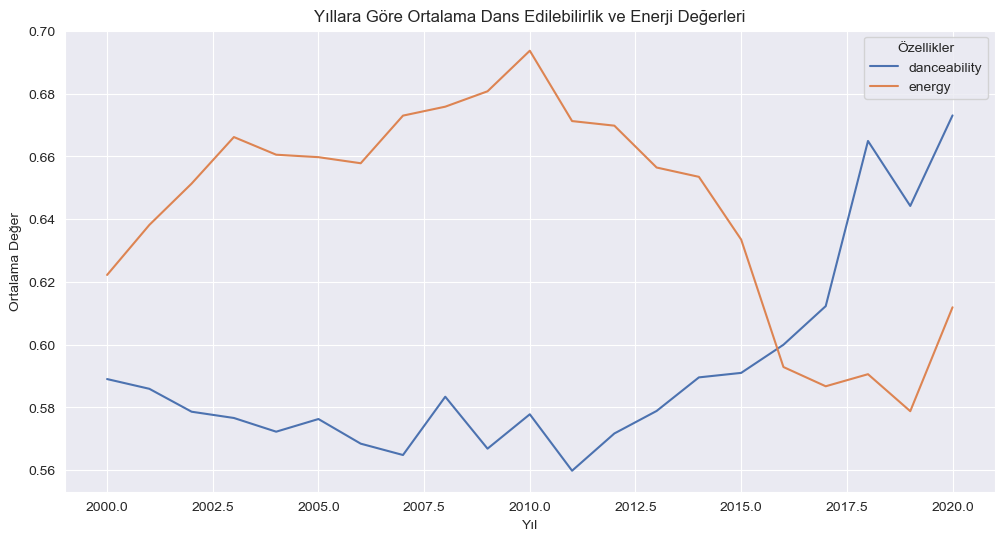

In [165]:
#60 Her Yıl İçin Ortalama Dans Edilebilirlik ve Enerji Değerleri
yearly_dance_energy = spotify_df.groupby('year')[['danceability', 'energy']].mean()
yearly_dance_energy.plot(kind='line', figsize=(12, 6))
plt.title('Yıllara Göre Ortalama Dans Edilebilirlik ve Enerji Değerleri')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Değer')
plt.legend(title='Özellikler')
plt.show()

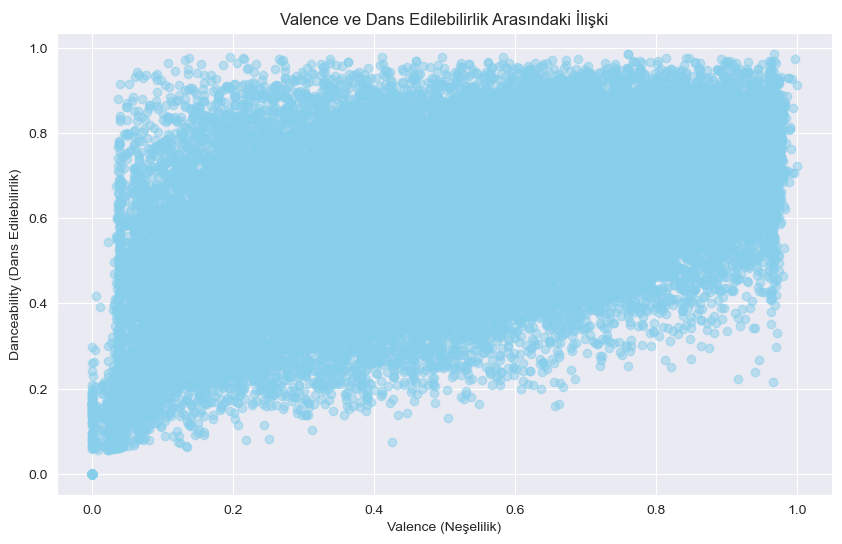

In [204]:
#61 Valence (Neşelilik) ve Dans Edilebilirlik İlişkisi (Dağılım Grafiği)
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['valence'], spotify_df['danceability'], alpha=0.5, color='skyblue')
plt.title('Valence ve Dans Edilebilirlik Arasındaki İlişki')
plt.xlabel('Valence (Neşelilik)')
plt.ylabel('Danceability (Dans Edilebilirlik)')
plt.show()

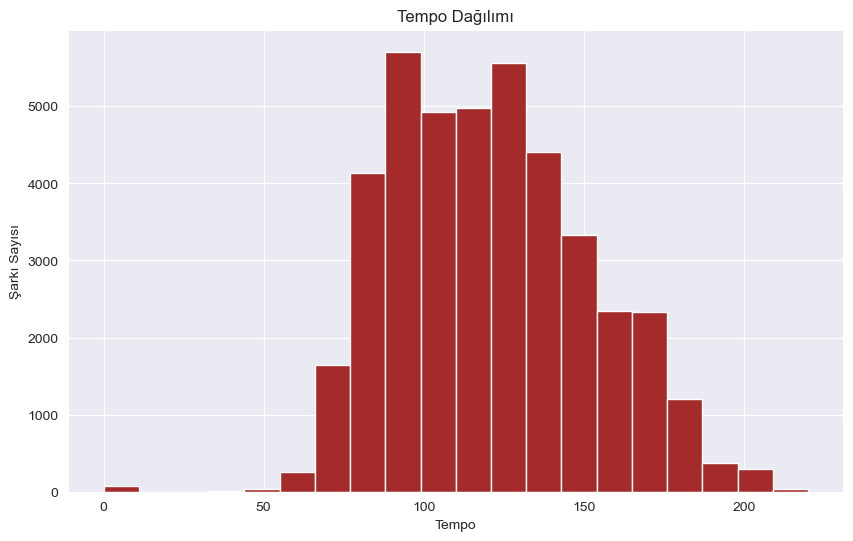

In [167]:
#62 Tempo dağılımının histogram grafiği
plt.figure(figsize=(10, 6))
spotify_df['tempo'].hist(bins=20, color='brown')
plt.title('Tempo Dağılımı')
plt.xlabel('Tempo')
plt.ylabel('Şarkı Sayısı')
plt.show()

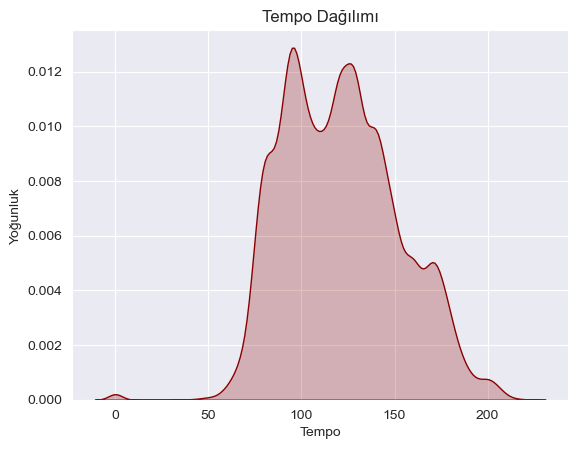

In [168]:
#63 Tempo Dağılımının Kernel Yoğunluk Grafiği ile Gösterimi
sns.kdeplot(spotify_df['tempo'], fill=True, color='darkred')
plt.title('Tempo Dağılımı')
plt.xlabel('Tempo')
plt.ylabel('Yoğunluk')
plt.show()

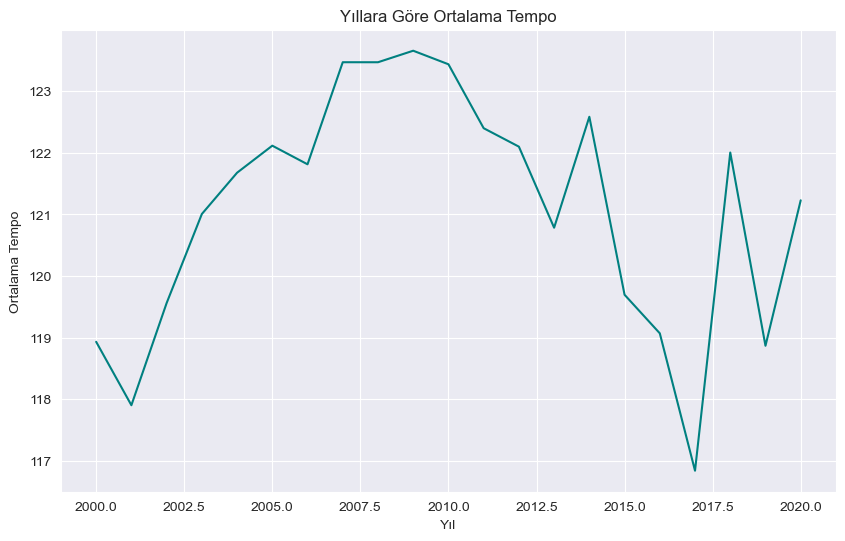

In [169]:
#64 Yıl Bazında Tempo Ortalamaları Çizgi grafikle gösterelim
avg_tempo_by_year = spotify_df.groupby('year')['tempo'].mean()
plt.figure(figsize=(10, 6))
avg_tempo_by_year.plot(kind='line', color='teal')
plt.title('Yıllara Göre Ortalama Tempo')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Tempo')
plt.show()

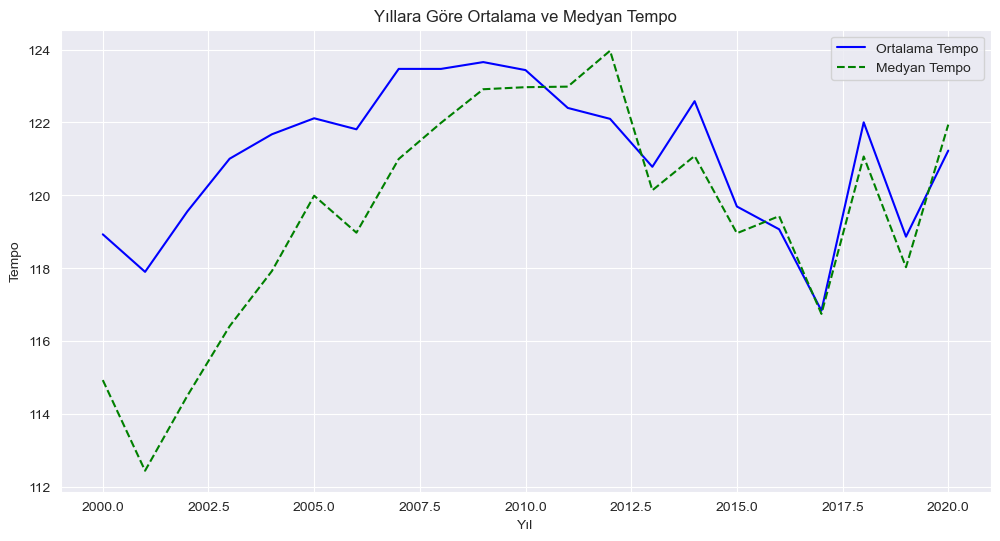

In [170]:
#65 Her yıl için tempo ortalaması ve medyanını yan yana çizgi grafikte gösterelim
avg_tempo_by_year = spotify_df.groupby('year')['tempo'].mean()
median_tempo_by_year = spotify_df.groupby('year')['tempo'].median()
plt.figure(figsize=(12, 6))
plt.plot(avg_tempo_by_year, label='Ortalama Tempo', color='blue')
plt.plot(median_tempo_by_year, label='Medyan Tempo', color='green', linestyle='--')
plt.title('Yıllara Göre Ortalama ve Medyan Tempo')
plt.xlabel('Yıl')
plt.ylabel('Tempo')
plt.legend()
plt.show()

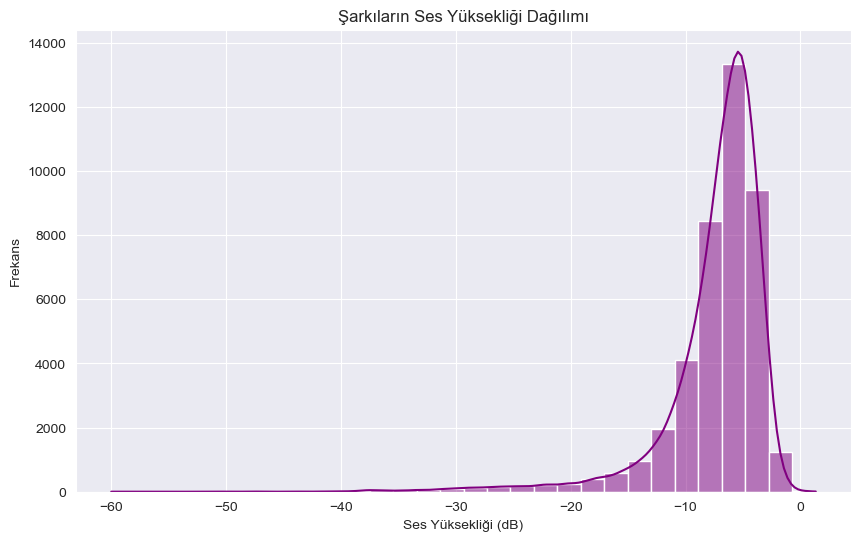

In [171]:
#66 Şarkıların Ses Yüksekliği (Loudness) Dağılımı - Histogram
plt.figure(figsize=(10, 6))
sns.histplot(spotify_df['loudness'], bins=30, kde=True, color='purple')
plt.title('Şarkıların Ses Yüksekliği Dağılımı')
plt.xlabel('Ses Yüksekliği (dB)')
plt.ylabel('Frekans')
plt.show()

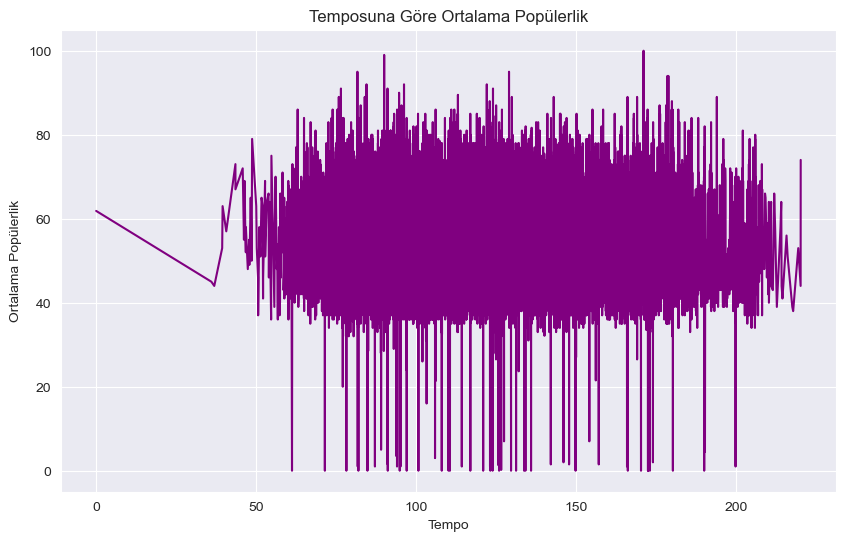

In [172]:
#67 Şarkıların Temposuna Göre Popülerlik Dağılımı - Çizgi Grafikte
tempo_popularity = spotify_df.groupby('tempo')['popularity'].mean()
tempo_popularity.plot(kind='line', figsize=(10, 6), color='purple')
plt.title('Temposuna Göre Ortalama Popülerlik')
plt.xlabel('Tempo')
plt.ylabel('Ortalama Popülerlik')
plt.show()

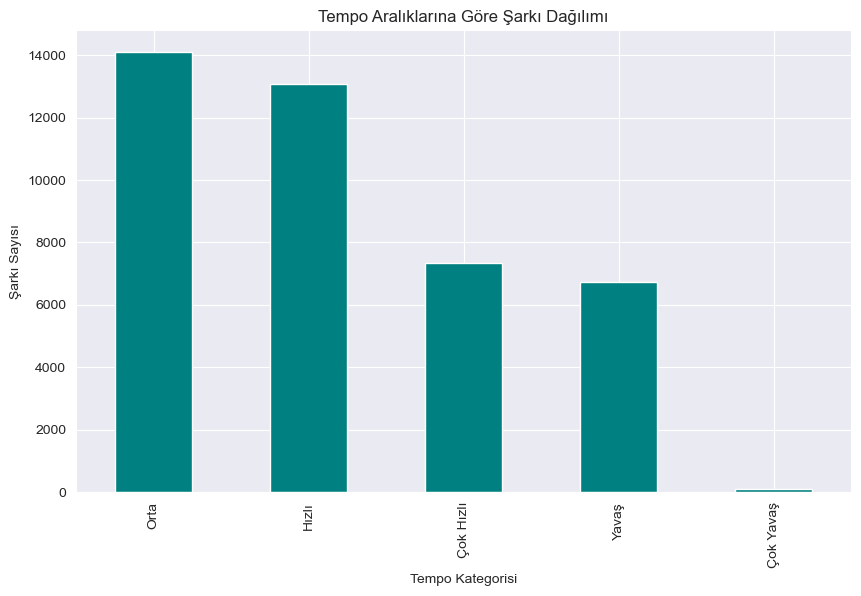

In [173]:
#68 Tempo Aralıklarına Göre Şarkı Dağılımı (Binning)
#tempo değerlerini belirli aralıklara bölerek şarkı dağılımını histogramda gösterimi
tempo_bins = [0, 60, 90, 120, 150, 200]
tempo_labels = ['Çok Yavaş', 'Yavaş', 'Orta', 'Hızlı', 'Çok Hızlı']
spotify_df['tempo_category'] = pd.cut(spotify_df['tempo'], bins=tempo_bins, labels=tempo_labels)
spotify_df['tempo_category'].value_counts().plot(kind='bar', color='teal', figsize=(10, 6))
plt.title('Tempo Aralıklarına Göre Şarkı Dağılımı')
plt.xlabel('Tempo Kategorisi')
plt.ylabel('Şarkı Sayısı')
plt.show()

In [174]:
#69 Akustikliği (acousticness) 0.5'in üzerinde olan şarkıların, ortalama dans edilebilirlik değeri
high_acousticness_danceability = spotify_df[spotify_df['acousticness'] > 0.5]['danceability'].mean()
high_acousticness_danceability

0.5223349628783552

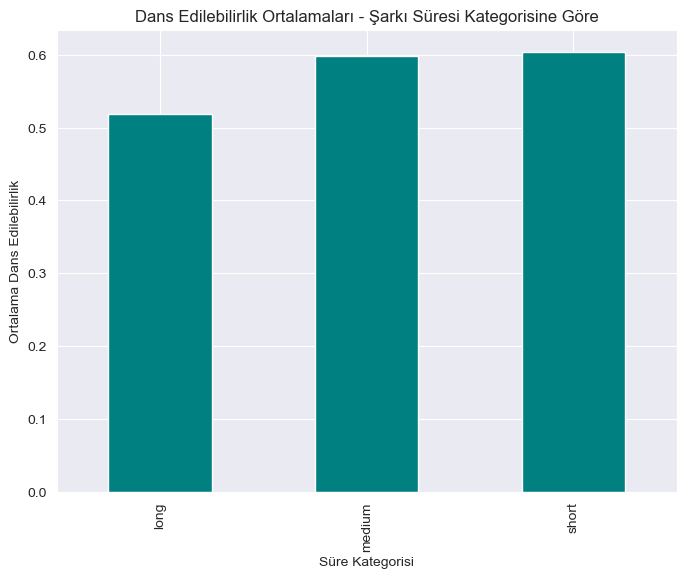

In [175]:
#70 Dans Edilebilirlik ve Şarkı Süresi Kategorisi Arasındaki İlişki
danceability_by_duration = spotify_df.groupby('duration_category')['danceability'].mean()
danceability_by_duration.plot(kind='bar', color='teal', figsize=(8, 6))
plt.title('Dans Edilebilirlik Ortalamaları - Şarkı Süresi Kategorisine Göre')
plt.xlabel('Süre Kategorisi')
plt.ylabel('Ortalama Dans Edilebilirlik')
plt.show()

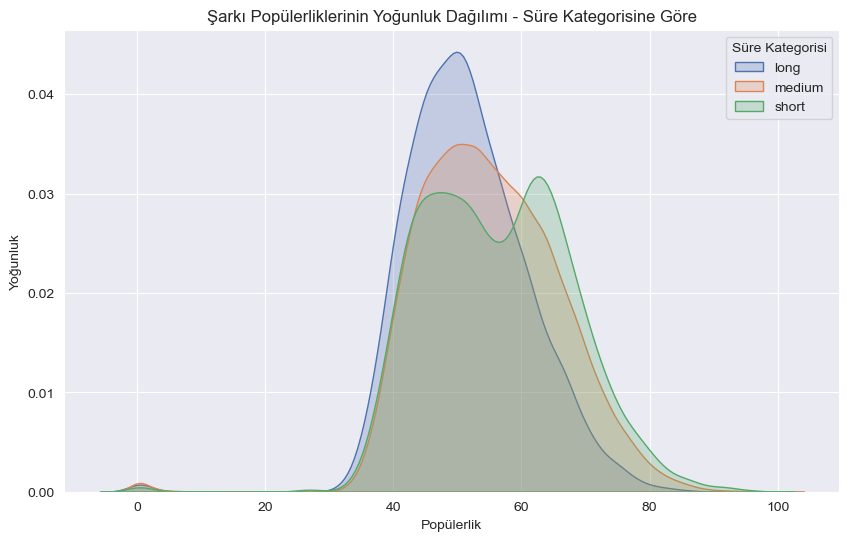

In [176]:
#71 Kategorilere Göre Şarkı Popülerliklerinin Yoğunluk Dağılımı
plt.figure(figsize=(10, 6))
for category in spotify_df['duration_category'].unique():
    subset = spotify_df[spotify_df['duration_category'] == category]
    sns.kdeplot(subset['popularity'], label=category, fill=True)  # 'shade=True' yerine 'fill=True' kullanıldı
plt.title('Şarkı Popülerliklerinin Yoğunluk Dağılımı - Süre Kategorisine Göre')
plt.xlabel('Popülerlik')
plt.ylabel('Yoğunluk')
plt.legend(title='Süre Kategorisi')
plt.show()

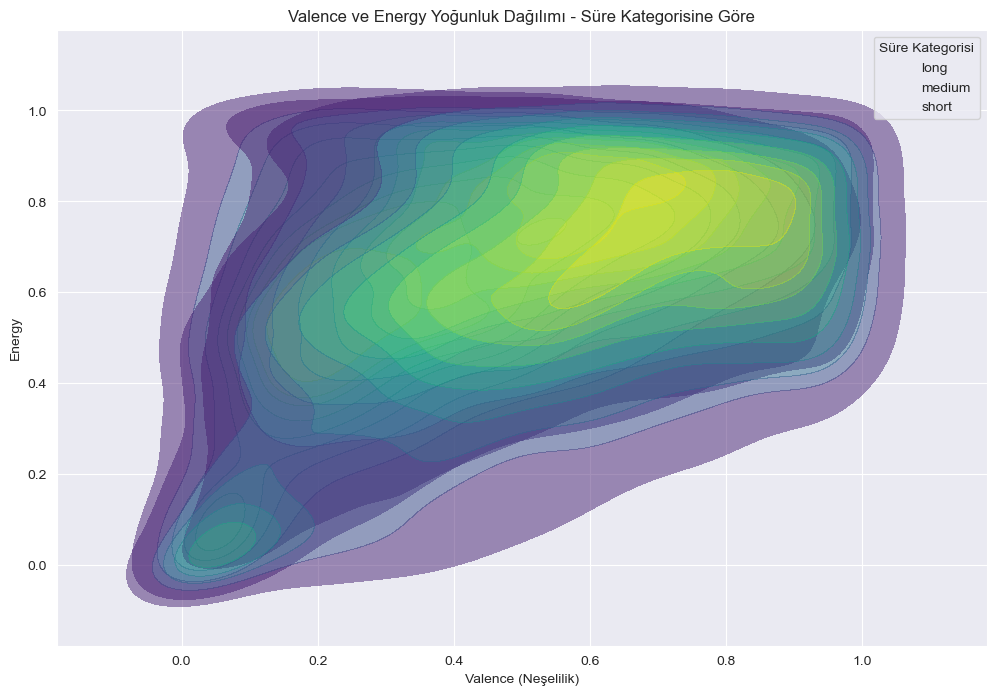

In [177]:
#72 Valence ve Energy Değerlerinin Yoğunluk Grafiği - Süre Kategorisine Göre
plt.figure(figsize=(12, 8))
for category in spotify_df['duration_category'].unique():
    subset = spotify_df[spotify_df['duration_category'] == category]
    sns.kdeplot(x=subset['valence'], y=subset['energy'], label=category, fill=True, cmap='viridis', alpha=0.5)
plt.title('Valence ve Energy Yoğunluk Dağılımı - Süre Kategorisine Göre')
plt.xlabel('Valence (Neşelilik)')
plt.ylabel('Energy')
plt.legend(title='Süre Kategorisi')
plt.show()

In [178]:
#73 Yüksek Akustiklik ve Düşük Enerjili Şarkılar
high_acoustic_low_energy_songs = spotify_df[(spotify_df['acousticness'] > 0.7) & (spotify_df['energy'] < 0.3)]
high_acoustic_low_energy_songs[['name', 'artists', 'acousticness', 'energy']].head(10)

name  \
0                                   Shout to the Lord   
9                                               Earth   
12  Ave Maria, Op. 52 No. 6, D. 839 (Arr. for Sopr...   
35                                     I Will Be Here   
42  Symphony No. 9 in E Minor, Op. 95 "From the Ne...   
51                                             Daniel   
58                                       Gortoz A Ran   
63                                     Hello in There   
74                        Young At Heart - Remastered   
75  432Hz Miracle Tone With 528Hz Solfeggio Frequency   

                                              artists  acousticness   energy  
0                                     ['David Bauer']         0.972  0.22700  
9   ['Hans Zimmer', 'Gavin Greenaway', 'The Lyndhu...         0.759  0.05040  
12  ['The Cathedral Singers', 'Lorelei McDermott',...         0.988  0.12200  
35                                ['Gary Valenciano']         0.793  0.21900  
42  ['Antonín Dvořák', 'London Symphony Orchestra'...         0.890  0.00261  
51                                           ['Fuel']         0.805  0.28700  
58                  ['Denez Prigent', 'Lisa Gerrard']         0.931  0.13600  
63                                     ['John Prine']         0.881  0.16100  
74                                  ['Frank Sinatra']         0.844  0.19100  
75                  ['PowerThoughts Meditation Club']         0.940  0.01570

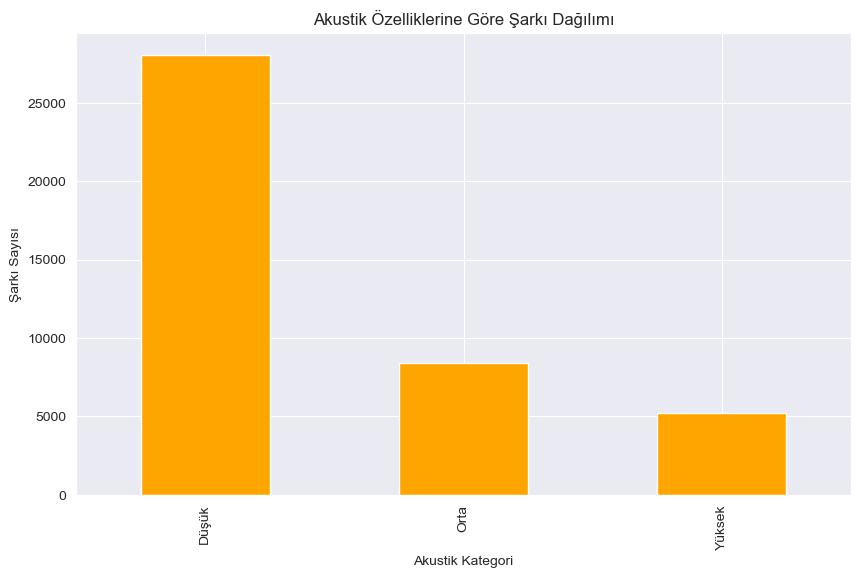

In [179]:
#74 Akustik Özelliklerine Göre Şarkı Dağılımı
#acousticness değerine göre şarkıları 3 kategoriye ayırarak (düşük, orta, yüksek) dağılımların histogramda gösterimi
acoustic_bins = [0, 0.3, 0.7, 1.0]
acoustic_labels = ['Düşük', 'Orta', 'Yüksek']
spotify_df['acoustic_category'] = pd.cut(spotify_df['acousticness'], bins=acoustic_bins, labels=acoustic_labels)
spotify_df['acoustic_category'].value_counts().plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Akustik Özelliklerine Göre Şarkı Dağılımı')
plt.xlabel('Akustik Kategori')
plt.ylabel('Şarkı Sayısı')
plt.show()

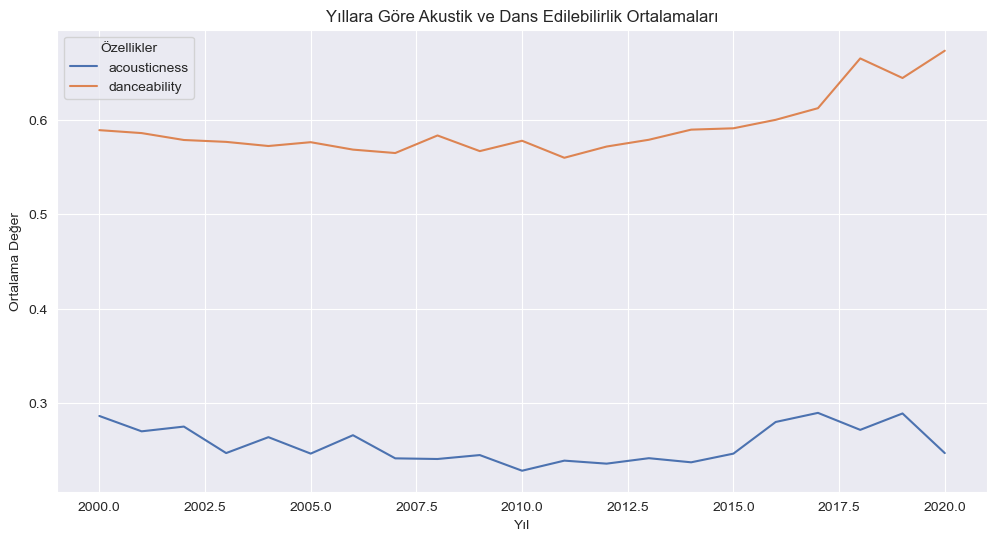

In [180]:
#75 Yıllara Göre Akustik ve Dans Edilebilirlik Ortalama Değerleri
yearly_acoustic_dance = spotify_df.groupby('year')[['acousticness', 'danceability']].mean()
yearly_acoustic_dance.plot(kind='line', figsize=(12, 6))
plt.title('Yıllara Göre Akustik ve Dans Edilebilirlik Ortalamaları')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Değer')
plt.legend(title='Özellikler')
plt.show()

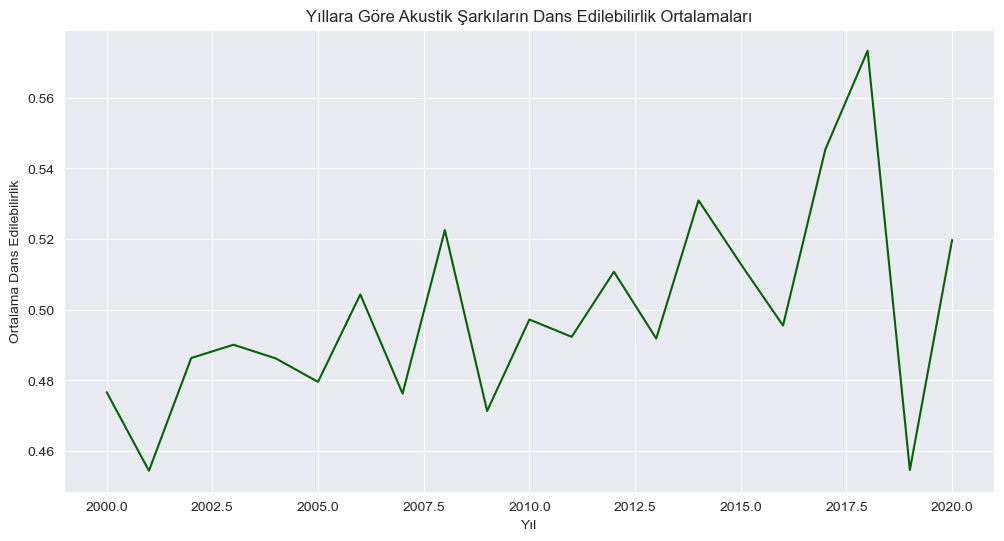

In [181]:
#76 Yıllara Göre Akustik Şarkıların Dans Edilebilirlik Dağılımı
acoustic_dance_yearly = spotify_df[spotify_df['acousticness'] > 0.6].groupby('year')['danceability'].mean()
acoustic_dance_yearly.plot(kind='line', color='darkgreen', figsize=(12, 6))
plt.title('Yıllara Göre Akustik Şarkıların Dans Edilebilirlik Ortalamaları')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Dans Edilebilirlik')
plt.show()

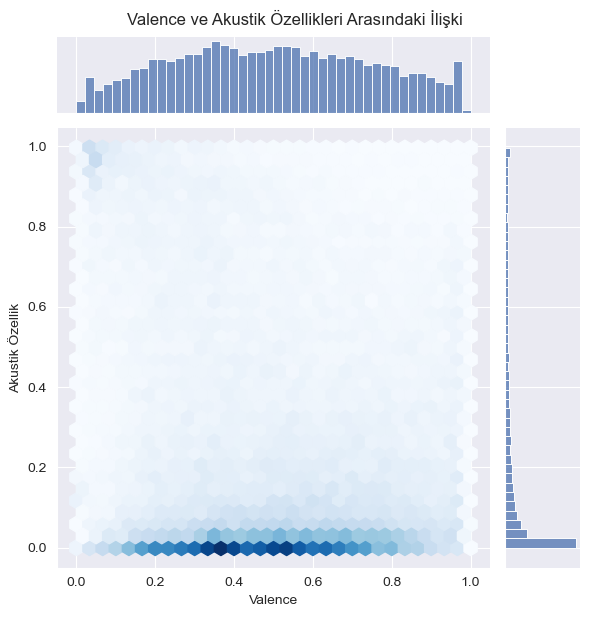

In [182]:
#77 Valence ve Akustik Özellikleri
#valence ve acousticness arasındaki ilişkiyi görselleştirme ve yoğunluk farkları

sns.jointplot(data=spotify_df, x='valence', y='acousticness', kind='hex', gridsize=30, cmap='Blues')
plt.suptitle('Valence ve Akustik Özellikleri Arasındaki İlişki', y=1.02)
plt.xlabel('Valence')
plt.ylabel('Akustik Özellik')
plt.show()

In [183]:
#78 Örnekleme - Şarkıların Küçük Bir Kısmı, Dans edilebilirlik ve Enerji başlıklarında
sample_subset = spotify_df[['name', 'artists', 'danceability', 'energy']].sample(50)
sample_subset.head()

name                     artists  danceability  energy
34407       El Centenario  ['Los Tucanes De Tijuana']         0.554   0.577
17884        Heart Attack              ['Trey Songz']         0.607   0.854
25618      Par De Anillos            ['Viento Y Sol']         0.490   0.675
36035   La Ultima Palabra          ['Daniel Calveti']         0.679   0.395
38556  Hungover & Hard Up             ['Eric Church']         0.674   0.717

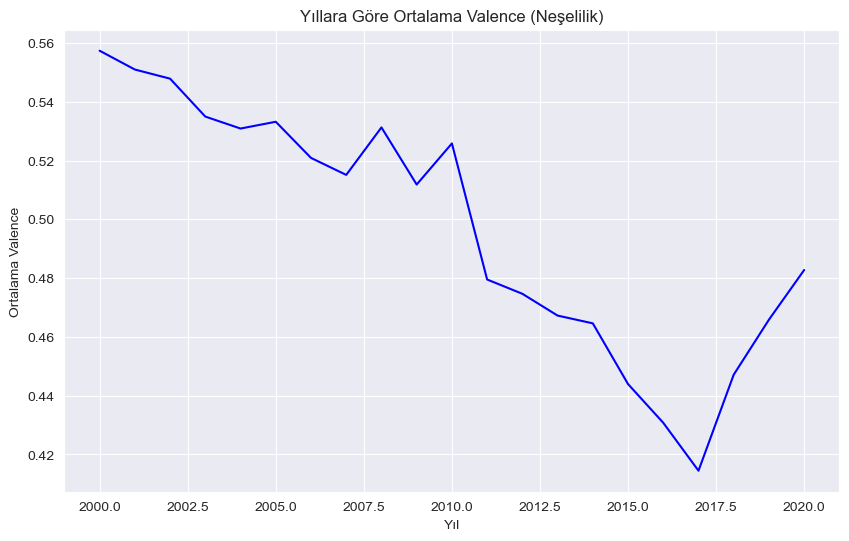

In [184]:
#79 Neşelilik Ortalaması
avg_valence_by_year = spotify_df.groupby('year')['valence'].mean()
plt.figure(figsize=(10,6))
avg_valence_by_year.plot(kind='line', color='blue')
plt.title('Yıllara Göre Ortalama Valence (Neşelilik)')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Valence')
plt.show()

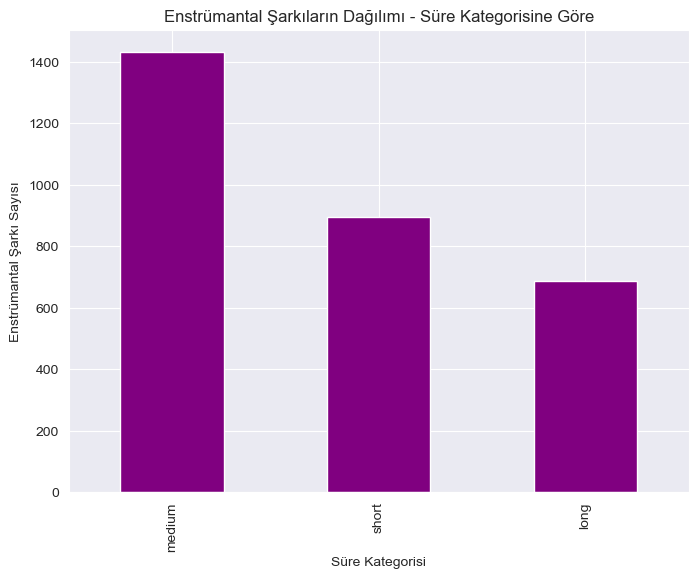

In [185]:
#80 Şarkı Süresi Kategorisine Göre Enstrümantal Şarkıların Dağılımı
instrumental_songs = spotify_df[spotify_df['instrumentalness'] > 0.5]
instrumental_by_duration = instrumental_songs['duration_category'].value_counts()
instrumental_by_duration.plot(kind='bar', color='purple', figsize=(8, 6))
plt.title('Enstrümantal Şarkıların Dağılımı - Süre Kategorisine Göre')
plt.xlabel('Süre Kategorisi')
plt.ylabel('Enstrümantal Şarkı Sayısı')
plt.show()

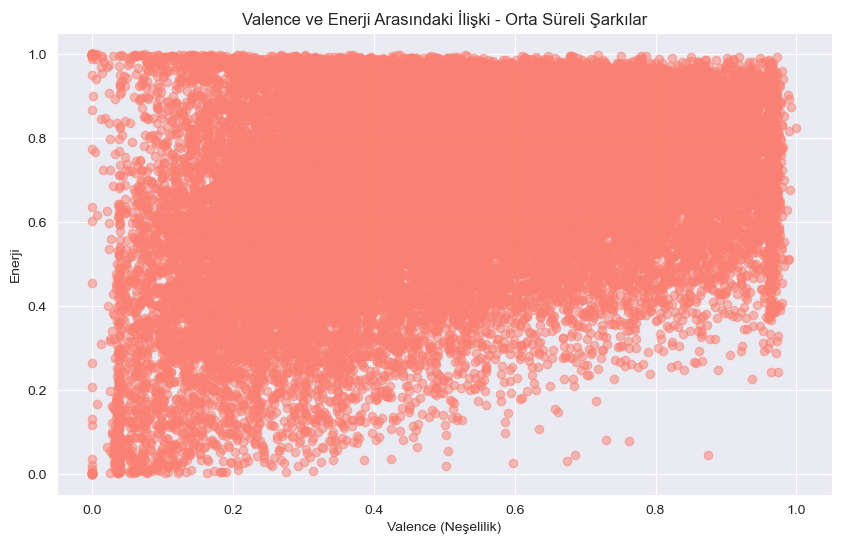

In [186]:
#81 "Medium" Süre Kategorisinde Valence ve Enerji İlişkisi
medium_songs = spotify_df[spotify_df['duration_category'] == 'medium']
plt.figure(figsize=(10, 6))
plt.scatter(medium_songs['valence'], medium_songs['energy'], alpha=0.5, color='salmon')
plt.title('Valence ve Enerji Arasındaki İlişki - Orta Süreli Şarkılar')
plt.xlabel('Valence (Neşelilik)')
plt.ylabel('Enerji')
plt.show()

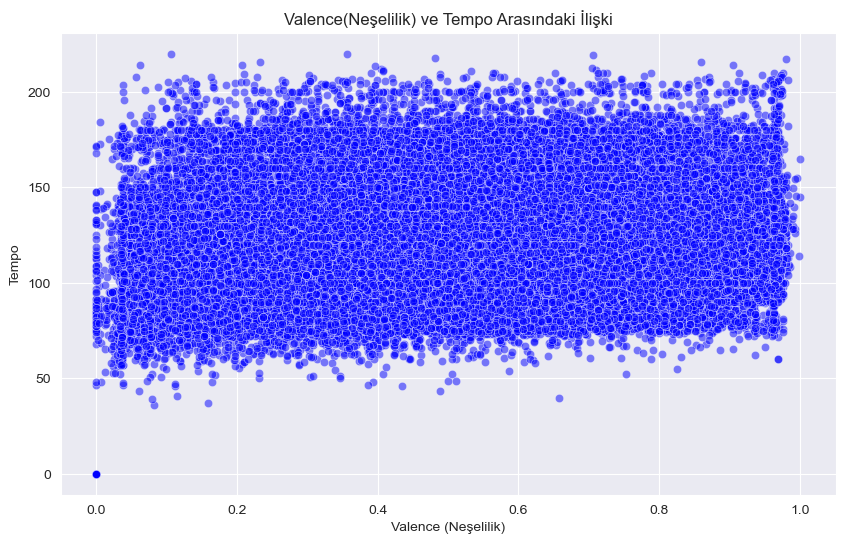

In [187]:
#82 Valence ve Tempo Arasındaki İlişki - Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_df, x='valence', y='tempo', alpha=0.5, color='blue')
plt.title('Valence(Neşelilik) ve Tempo Arasındaki İlişki')
plt.xlabel('Valence (Neşelilik)')
plt.ylabel('Tempo')
plt.show()

In [188]:
#83 "Medium" Süre Kategorisindeki Enstrümantal Şarkılar
medium_instrumental_songs = spotify_df[(spotify_df['duration_category'] == 'medium') & (spotify_df['instrumentalness'] > 0.5)]
medium_instrumental_songs[['name', 'artists', 'instrumentalness']].head(10)

name  \
9                                      Earth   
47                                    Thomas   
55                                Press Gang   
64                               Black Night   
70                      Exactly Where I'm At   
89                       D>E>A>T>H>M>E>T>A>L   
128                          Who's That Lady   
144  Hogwarts Forever! and the Moving Stairs   
161                                  Bag End   
172                       Beyond This Moment   

                                               artists  instrumentalness  
9    ['Hans Zimmer', 'Gavin Greenaway', 'The Lyndhu...             0.948  
47                                ['A Perfect Circle']             0.814  
55                          ['The Murder City Devils']             0.666  
64                                     ['Deep Purple']             0.522  
70                                            ['Ween']             0.718  
89                                        ['Panchiko']             0.528  
128                                    ['Peter White']             0.797  
144                                  ['John Williams']             0.607  
161                                   ['Howard Shore']             0.545  
172                                ["Patrick O'Hearn"]             0.876

In [189]:
#84 Dans Edilebilirliği Yüksek Olan "Long" Şarkılar
long_dance_songs = spotify_df[(spotify_df['duration_category'] == 'long') & (spotify_df['danceability'] > 0.8)]
long_dance_songs[['name', 'artists', 'danceability']].head(10)

name  \
1                                              Miss You   
148        I Can't Go for That (No Can Do) - Remastered   
477   Da Blow (feat. Jazze Pha, Pimpin Ken, Trillville)   
600            LoveStoned / I Think She Knows Interlude   
781                              And the Living Is Easy   
867                     After Hours (Extended Euro Mix)   
939                                               Alive   
1085                    These Days (feat. 77 Jefferson)   
1108             Bounce, Rock, Skate, Roll - Remastered   
1458                                  No Tiene la Culpa   

                                                artists  danceability  
1                                        ['Etta James']         0.821  
148                         ['Daryl Hall & John Oates']         0.873  
477   ['Jazze Pha', 'Lil Jon & The East Side Boyz', ...         0.850  
600                               ['Justin Timberlake']         0.862  
781                                            ['Guts']         0.874  
867                                  ['Living Legends']         0.894  
939                                 ['Black Eyed Peas']         0.801  
1085                                 ['Josh Heinrichs']         0.845  
1108                         ['Vaughan Mason and Crew']         0.882  
1458                                   ['Romeo Santos']         0.827

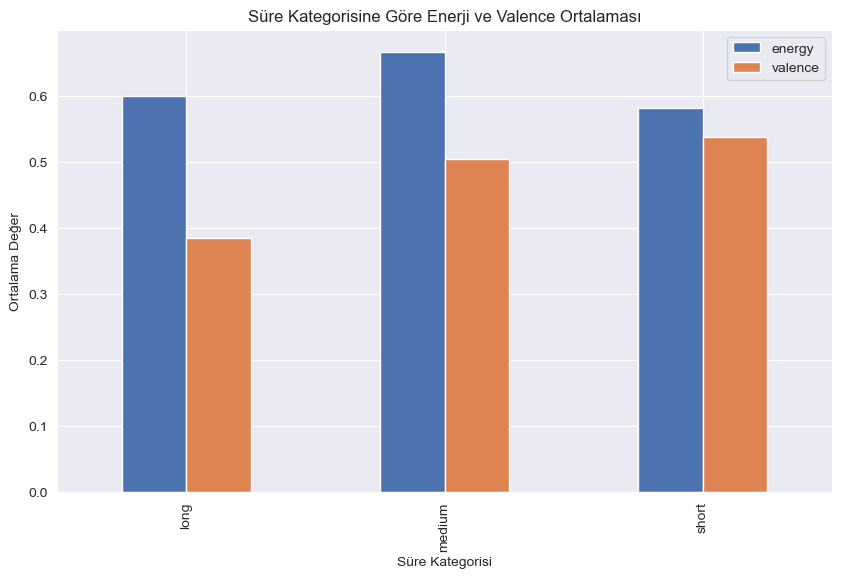

In [190]:
#85 Şarkıların Enerji ve Valence Ortalaması - Süre Kategorisine Göre
energy_valence_by_duration = spotify_df.groupby('duration_category')[['energy', 'valence']].mean()
energy_valence_by_duration.plot(kind='bar', figsize=(10, 6))
plt.title('Süre Kategorisine Göre Enerji ve Valence Ortalaması')
plt.xlabel('Süre Kategorisi')
plt.ylabel('Ortalama Değer')
plt.show()

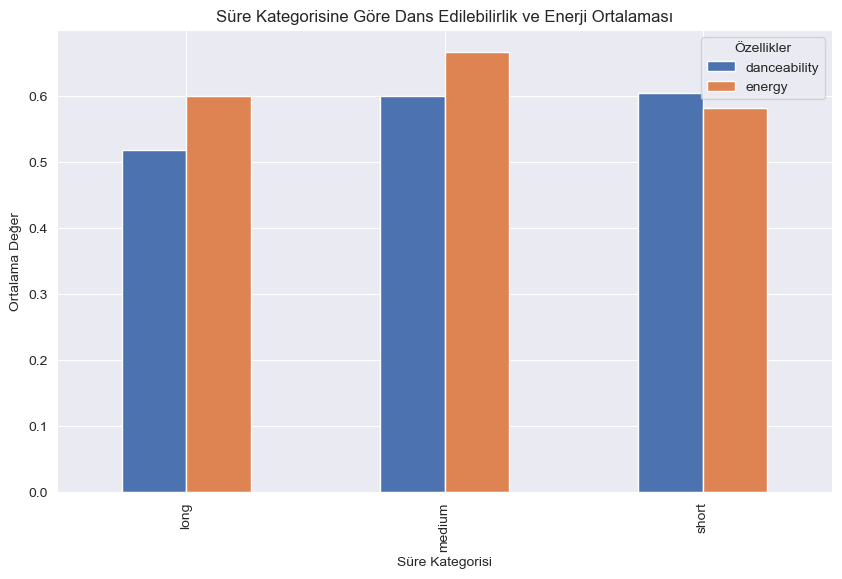

In [191]:
#86 Şarkıların Dans Edilebilirlik ve Enerji Ortalaması - Süre Kategorisine Göre
dance_energy_avg = spotify_df.groupby('duration_category')[['danceability', 'energy']].mean()
dance_energy_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Süre Kategorisine Göre Dans Edilebilirlik ve Enerji Ortalaması')
plt.xlabel('Süre Kategorisi')
plt.ylabel('Ortalama Değer')
plt.legend(title='Özellikler')
plt.show()

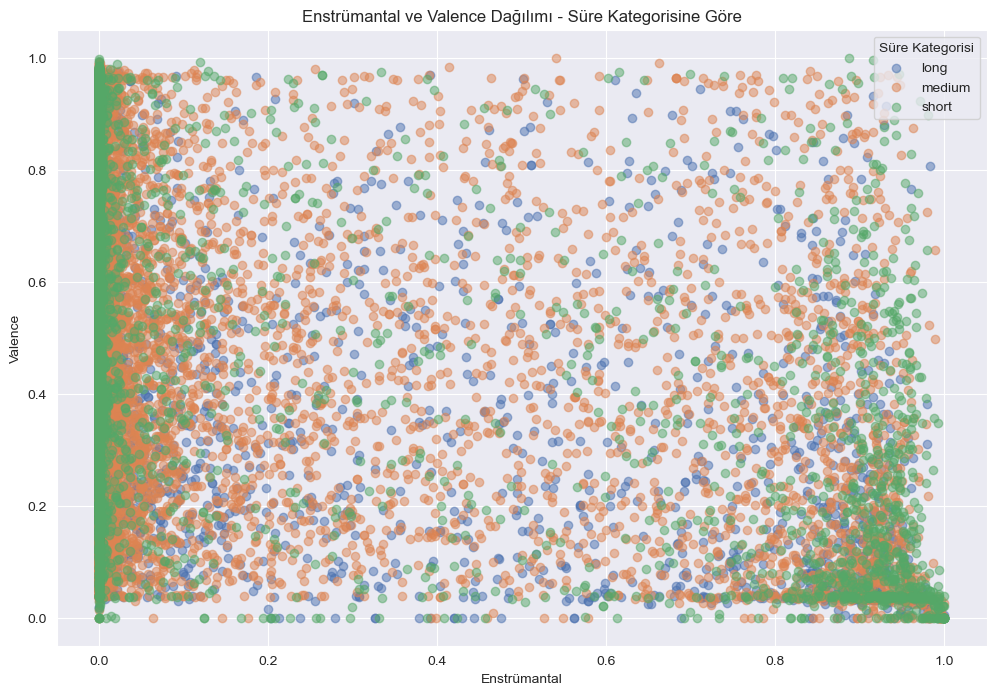

In [192]:
#87 Şarkıların Enstrümantal ve Valence Dağılımı - Süre Kategorisine Göre
plt.figure(figsize=(12, 8))
for category in spotify_df['duration_category'].unique():
    subset = spotify_df[spotify_df['duration_category'] == category]
    if not subset.empty:
        plt.scatter(subset['instrumentalness'], subset['valence'], alpha=0.5, label=category)
plt.title('Enstrümantal ve Valence Dağılımı - Süre Kategorisine Göre')
plt.xlabel('Enstrümantal')
plt.ylabel('Valence')
plt.legend(title='Süre Kategorisi')
plt.show()

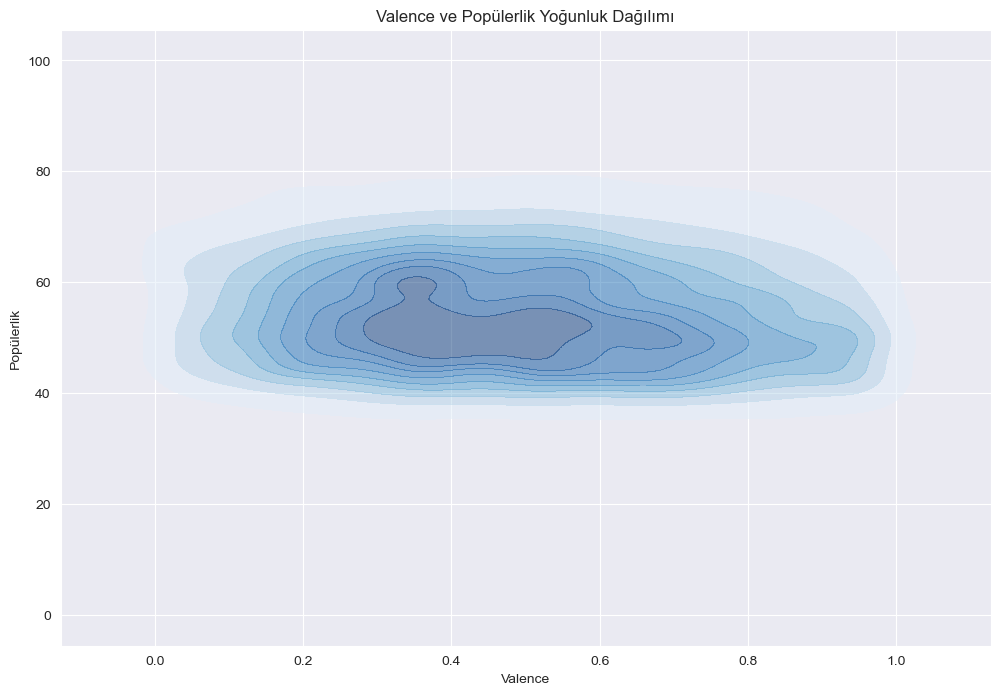

In [193]:
#88 Valence ve Popularity Değerlerine Göre Yoğunluk Dağılımı
plt.figure(figsize=(12, 8))
sns.kdeplot(data=spotify_df, x='valence', y='popularity', fill=True, cmap='Blues', alpha=0.5)
plt.title('Valence ve Popülerlik Yoğunluk Dağılımı')
plt.xlabel('Valence')
plt.ylabel('Popülerlik')
plt.show()

In [194]:
#89 En Popüler 5 Şarkı (Enstrümantal ve Akustik Olanlar)
instrumental_acoustic_songs = spotify_df[(spotify_df['instrumentalness'] > 0.8) & (spotify_df['acousticness'] > 0.7)]
instrumental_acoustic_songs.nlargest(5, 'popularity')[['name', 'artists', 'popularity']]

name  \
22569  Clean White Noise - Loopable with no fade   
22591                                  Buttercup   
22568                       White Noise - 145 hz   
24459                               Sunset Lover   
29042                 White Noise Crashing Waves   

                                                 artists  popularity  
22569  ['Erik Eriksson', 'White Noise Baby Sleep', 'W...        86.0  
22591                                   ['Jack Stauber']        81.0  
22568                                       ['Granular']        80.0  
24459                                  ['Petit Biscuit']        77.0  
29042                                     ['Bruce Brus']        76.0

In [195]:
#90 Dans Edilebilirliği Yüksek Şarkıların Ortalama Popularity ve Valence Dağılımı
high_danceable_avg = spotify_df[spotify_df['danceability'] > 0.8][['popularity', 'valence']].mean()
high_danceable_avg

popularity    57.264047
valence        0.643911
dtype: float64

In [196]:
#91 Enerjisi ve Temposu Yüksek Şarkıların En Popüler 10 Tanesi
high_energy_tempo_songs = spotify_df[(spotify_df['energy'] > 0.8) & (spotify_df['tempo'] > 120)]
high_energy_tempo_songs.nlargest(10, 'popularity')[['name', 'artists', 'energy', 'tempo', 'popularity']]

name                         artists  \
22868  Rain On Me (with Ariana Grande)  ['Lady Gaga', 'Ariana Grande']   
22885                       Boss Bitch                    ['Doja Cat']   
22937                       La Difícil                   ['Bad Bunny']   
22934      Sour Candy (with BLACKPINK)      ['Lady Gaga', 'BLACKPINK']   
22951  Rain On Me (with Ariana Grande)  ['Lady Gaga', 'Ariana Grande']   
24953                             Salt                     ['Ava Max']   
31208                         Favorito                      ['Camilo']   
24987      Sour Candy (with BLACKPINK)      ['Lady Gaga', 'BLACKPINK']   
25037                         Physical                    ['Dua Lipa']   
22585                          Thunder             ['Imagine Dragons']   

       energy    tempo  popularity  
22868   0.855  123.056        94.0  
22885   0.955  125.989        92.0  
22937   0.848  179.870        88.0  
22934   0.870  120.006        87.0  
22951   0.855  123.056        87.0  
24953   0.835  128.057        87.0  
31208   0.851  178.032        87.0  
24987   0.870  120.006        86.0  
25037   0.844  146.962        85.0  
22585   0.822  167.997        84.0

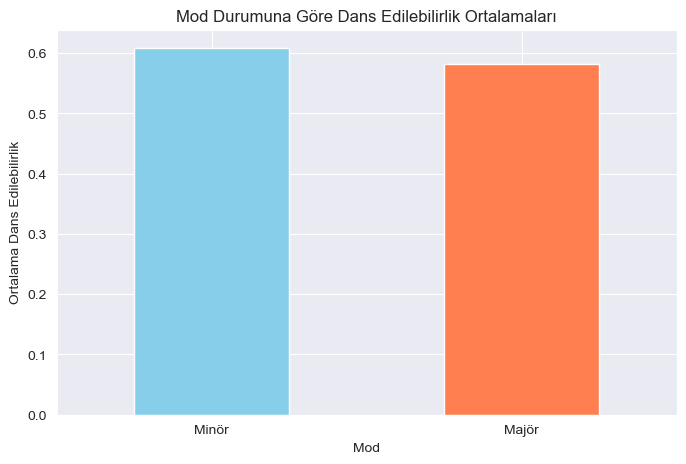

In [197]:
#92 Şarkıların Mod Durumuna Göre Dans Edilebilirlik Ortalamaları
#mode değeri 0 ve 1 olan şarkılar için danceability ortalamaların karşılaştırılması
mode_danceability_avg = spotify_df.groupby('mode')['danceability'].mean()
mode_danceability_avg.plot(kind='bar', color=['skyblue', 'coral'], figsize=(8, 5))
plt.title('Mod Durumuna Göre Dans Edilebilirlik Ortalamaları')
plt.xlabel('Mod')
plt.ylabel('Ortalama Dans Edilebilirlik')
plt.xticks([0, 1], ['Minör', 'Majör'], rotation=0)
plt.show()

In [198]:
#93 Popülerliğe Göre Akustik Şarkıların Dağılımı- En Popüler 5 şarkı
acoustic_songs = spotify_df[spotify_df['acousticness'] > 0.7]
acoustic_songs.nlargest(5, 'popularity')[['name', 'artists', 'popularity', 'acousticness']]

name  \
22865  death bed (coffee for your head) (feat. beabad...   
22859                                         Party Girl   
22772                                  Someone You Loved   
22781                                           Memories   
22773                                everything i wanted   

                        artists  popularity  acousticness  
22865  ['Powfu', 'beabadoobee']        97.0         0.731  
22859        ['StaySolidRocky']        94.0         0.749  
22772         ['Lewis Capaldi']        92.0         0.751  
22781              ['Maroon 5']        91.0         0.837  
22773         ['Billie Eilish']        90.0         0.902

In [199]:
#94 Enstrümantal Özelliği Çok Yüksek Olan Şarkılar (Enstrümantal ve Popüler)
instrumental_songs = spotify_df[spotify_df['instrumentalness'] > 0.9]
instrumental_songs.nlargest(5, 'popularity')[['name', 'artists', 'popularity', 'instrumentalness']]

name  \
22569  Clean White Noise - Loopable with no fade   
24589                                 Astronomia   
24860                    Can I Call You Tonight?   
24760                           Soft Brown Noise   
3789                                  Astronomia   

                                                 artists  popularity  \
22569  ['Erik Eriksson', 'White Noise Baby Sleep', 'W...        86.0   
24589                           ['Vicetone', 'Tony Igy']        81.0   
24860                                        ['Dayglow']        80.0   
24760                          ['High Altitude Samples']        78.0   
3789                            ['Vicetone', 'Tony Igy']        77.0   

       instrumentalness  
22569             1.000  
24589             0.915  
24860             0.910  
24760             1.000  
3789              0.915

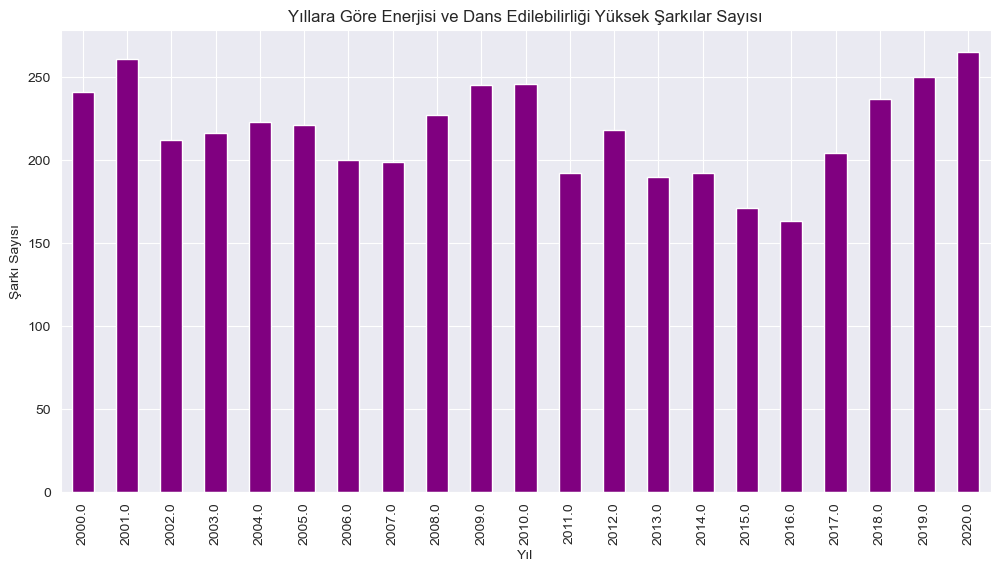

In [200]:
#95 Enerjisi ve Dans Edilebilirliği Yüksek Şarkıların Yıllara Göre Sayı Dağılımı
high_energy_dance_songs = spotify_df[(spotify_df['energy'] > 0.7) & (spotify_df['danceability'] > 0.7)]
high_energy_dance_count = high_energy_dance_songs['year'].value_counts().sort_index()
high_energy_dance_count.plot(kind='bar', color='purple', figsize=(12, 6))
plt.title('Yıllara Göre Enerjisi ve Dans Edilebilirliği Yüksek Şarkılar Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Şarkı Sayısı')
plt.show()

In [201]:
#96 Yüksek Valence ve Düşük Dans Edilebilirlik Özelliği Gösteren Şarkılar
high_valence_low_dance = spotify_df[(spotify_df['valence'] > 0.7) & (spotify_df['danceability'] < 0.3)]
high_valence_low_dance.nlargest(10, 'popularity')[['name', 'artists', 'valence', 'danceability', 'popularity']]

name                    artists  \
26705                         All Eyes On Us           ['Jon Langston']   
26317                          Mind Mischief            ['Tame Impala']   
28010                               New Fang  ['Them Crooked Vultures']   
38081              Mission: Impossible Theme      ['Michael Giacchino']   
38106                                 Ti amo          ['Umberto Tozzi']   
27526                  Right Side Of The Bed                 ['Atreyu']   
32165                            Cornerstone         ['Arctic Monkeys']   
38253  When the Levee Breaks - 2007 Remaster           ['Led Zeppelin']   
5585                                     You               ['The 1975']   
40066              I Wonder Why - Remastered    ['Dion & The Belmonts']   

       valence  danceability  popularity  
26705    0.723         0.276        64.0  
26317    0.822         0.250        63.0  
28010    0.752         0.278        59.0  
38081    0.764         0.299        56.0  
38106    0.702         0.283        56.0  
27526    0.720         0.253        54.0  
32165    0.763         0.287        50.0  
38253    0.813         0.266        50.0  
5585     0.966         0.215        49.0  
40066    0.946         0.266        48.0

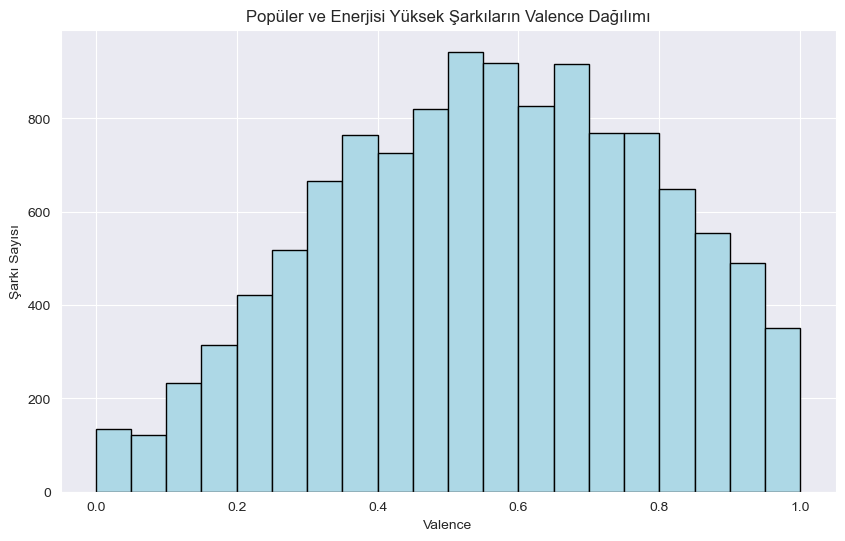

In [202]:
#97 Popülerliği ve Enerjisi Yüksek Şarkıların Valence Dağılımı
high_pop_energy = spotify_df[(spotify_df['popularity'] > 0.8) & (spotify_df['energy'] > 0.8)]
high_pop_energy['valence'].plot(kind='hist', bins=20, color='lightblue', edgecolor='black', figsize=(10, 6))
plt.title('Popüler ve Enerjisi Yüksek Şarkıların Valence Dağılımı')
plt.xlabel('Valence')
plt.ylabel('Şarkı Sayısı')
plt.show()

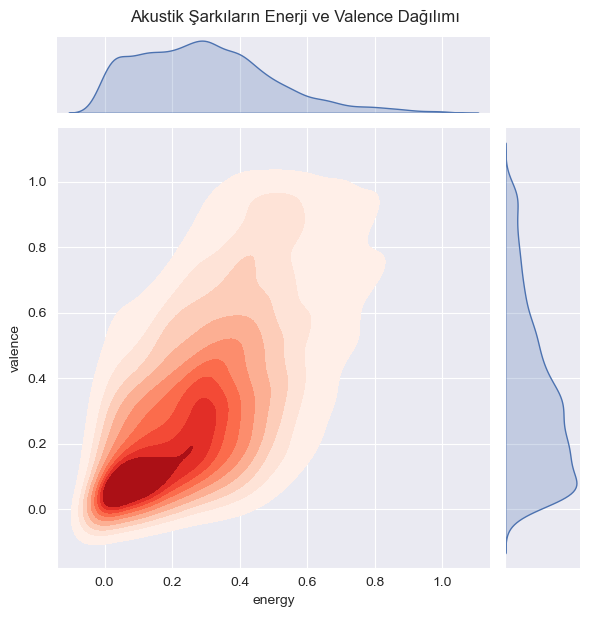

In [109]:
#98 Akustik Şarkıların Enerji ve Valence Dağılımı
high_acoustic = spotify_df[spotify_df['acousticness'] > 0.7]
sns.jointplot(data=high_acoustic, x='energy', y='valence', kind='kde', fill=True, cmap='Reds')
plt.suptitle('Akustik Şarkıların Enerji ve Valence Dağılımı', y=1.02)
plt.show()

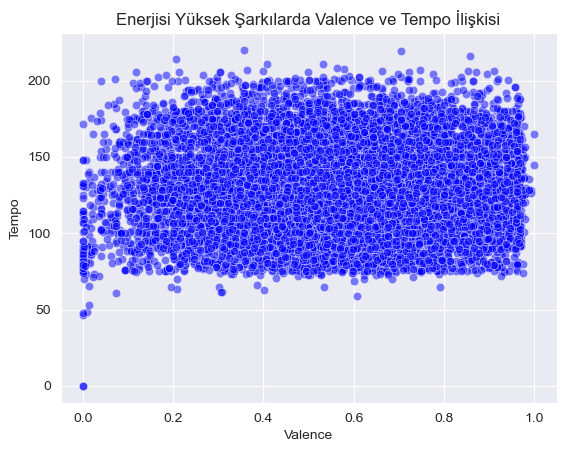

In [110]:
#99 Enerjisi Yüksek Olan Şarkıların Valence ve Tempo İlişkisi
high_energy_songs = spotify_df[spotify_df['energy'] > 0.8]
sns.scatterplot(data=high_energy_songs, x='valence', y='tempo', alpha=0.5, color='blue')
plt.title('Enerjisi Yüksek Şarkılarda Valence ve Tempo İlişkisi')
plt.xlabel('Valence')
plt.ylabel('Tempo')
plt.show()

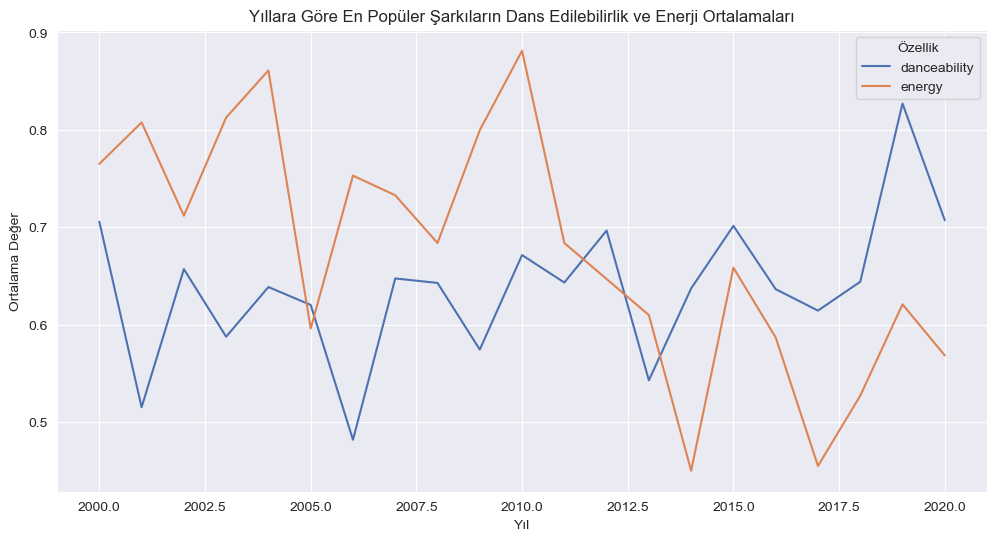

In [111]:
#100 Yıllara Göre Popülerliği En Yüksek 5 Şarkının Dans Edilebilirlik ve Enerji Ortalamaları
top_songs_by_year = spotify_df.groupby('year').apply(lambda x: x.nlargest(5, 'popularity')).reset_index(drop=True)
top_songs_yearly_avg = top_songs_by_year.groupby('year')[['danceability', 'energy']].mean()
top_songs_yearly_avg.plot(kind='line', figsize=(12, 6))
plt.title('Yıllara Göre En Popüler Şarkıların Dans Edilebilirlik ve Enerji Ortalamaları')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Değer')
plt.legend(title='Özellik')
plt.show()